<h1>
<font color=Green>TELECOM CHURN CASE STUDY</font>
</h1>

<hr>

### Author
- Prashant Mohan Sinha

<hr>

<h1>
<font color=Green>Problem Statement</font>
</h1>

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. The given fact is; it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, we will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn.

<hr>

<h1>
<font color=Green>Data Provision</font>
</h1>

We have been provided with the csv data set  namely `train (1).csv`, `test (1).csv` & `data_dictionary (1)).csv`.


Data dictionary csv file which describes the meaning of provided variables in `train (1).csv` & `test (1).csv`.

<hr>

<h1>
<font color=Green>Modelling Approach</font>
</h1>

1) Data Loading, Data inspection and preparation <br>
2) EDA <br>
3) Quick look with Pycaret <br>
4) Model building and optimization <br>
5) Evaluation of the model outcome <br>
6) Summary

<hr>

<h3>
<font color=Green>Import the Requisite Libraries</font>
</h3>

In [1]:
# importing libraries and supress warnings
%matplotlib inline

import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns, plotly.express as px

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

import warnings
warnings.filterwarnings('ignore')

<hr>

<h3>
<font color=Green>Read CSV Data files & Display some Info </font>
</h3>

In [2]:
# Read the csv files
raw_train_data=pd.read_csv('train (1).csv',low_memory=False) # Provided Train Data file
raw_test_data=pd.read_csv('test (1).csv',low_memory=False) # Provided Test Data file

raw_train_data.name = 'Raw_Train_DF'
raw_test_data.name = 'Raw_Test_DF'

In [3]:
# Data Size of both files
print('Train data size = ',raw_train_data.shape)
print('Test data size = ',raw_test_data.shape)

Train data size =  (69999, 172)
Test data size =  (30000, 171)


In [4]:
# Display the Random 6 Rows of Train Data File
raw_train_data.sample(6)

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
4590    4590        109             NaN             NaN             NaN   
22796  22796        109             NaN             NaN             NaN   
35732  35732        109             0.0             0.0             0.0   
69732  69732        109             0.0             0.0             0.0   
29314  29314        109             0.0             0.0             0.0   
34219  34219        109             0.0             0.0             0.0   

      last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
4590             6/30/2014                  NaN                  NaN  230.750   
22796            6/30/2014            7/31/2014            8/31/2014  213.818   
35732            6/30/2014            7/31/2014            8/31/2014   78.841   
69732            6/30/2014            7/31/2014            8/31/2014   87.452   
29314            6/30/2014            7/31/2014            8/31/2014  217.825   
34219            6/30/2014            7/31/2014            8/31/2014  238.327   

        arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
4590     0.000    0.000          NaN          NaN          NaN           NaN   
22796  213.830  427.605          NaN          NaN          NaN           NaN   
35732   68.846  339.194        30.98        21.84        42.11         94.29   
69732  -77.564  327.035         3.06         0.83         1.25         55.46   
29314  244.179  212.119         4.63        16.23        32.29        176.26   
34219  193.757  176.229        42.63        37.11        39.53        111.36   

       offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
4590            NaN           NaN            NaN            NaN   
22796           NaN           NaN            NaN            NaN   
35732         25.39         44.96            0.0            0.0   
69732         73.99         66.36            0.0            0.0   
29314        142.74        140.53            0.0            0.0   
34219         70.03        127.28            0.0            0.0   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
4590             NaN            NaN            NaN            NaN   
22796            NaN            NaN            NaN            NaN   
35732           0.00            0.0            0.0           0.00   
69732           6.53            0.0            0.0          35.76   
29314           0.00            0.0            0.0           0.00   
34219           0.00            0.0            0.0           0.00   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
4590                NaN               NaN               NaN               NaN   
22796               NaN               NaN               NaN               NaN   
35732             30.98             21.84             42.11             93.11   
69732              1.99              0.83              0.00             38.74   
29314              4.63             16.23             32.29            176.26   
34219             42.63             37.11             39.53            103.09   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
4590                NaN               NaN               NaN               NaN   
22796               NaN               NaN               NaN               NaN   
35732             25.13             44.09              0.35              0.00   
69732             44.49             13.59              0.56              5.98   
29314            140.91            139.49              0.00              0.45   
34219             70.03            127.28              0.00              0.00   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
4590                NaN               NaN               NaN               NaN   
22796               NaN               NaN               NaN               NaN   
35732              0.8

In [5]:
# Display the Random 6 Rows of Test Data File
raw_test_data.sample(6)

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
8721   78720        109             0.0             0.0             0.0   
31     70030        109             0.0             0.0             0.0   
18306  88305        109             0.0             0.0             0.0   
24474  94473        109             0.0             0.0             0.0   
26069  96068        109             0.0             0.0             0.0   
15521  85520        109             0.0             0.0             0.0   

      last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
8721             6/30/2014            7/31/2014            8/31/2014   
31               6/30/2014            7/31/2014            8/31/2014   
18306            6/30/2014            7/31/2014            8/31/2014   
24474            6/30/2014            7/31/2014            8/31/2014   
26069            6/30/2014            7/31/2014            8/31/2014   
15521            6/30/2014            7/31/2014            8/31/2014   

         arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
8721   1492.779  2515.854  1027.761        49.78        32.83        20.89   
31      900.871    56.644   618.158        34.54        12.78        18.59   
18306    98.818    69.836    73.028         7.38         2.23        26.29   
24474    23.757   321.873   252.401         5.96       326.88       328.93   
26069    77.770    63.495    64.515         2.66         1.99         8.33   
15521   195.743   240.763   258.697        51.84        75.33        35.73   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
8721        2339.28       3675.01       1659.26           0.00            0.0   
31           195.06         50.66        128.28           0.00            0.0   
18306         34.28         36.54         16.26           0.00            0.0   
24474          6.29        124.06        144.36           6.81            0.0   
26069         68.41         69.28         46.16           0.00            0.0   
15521        132.46        143.28        167.54           0.00            0.0   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
8721             0.0           0.00            0.0            0.0   
31               0.0           0.00            0.0            0.0   
18306            0.0           0.00            0.0            0.0   
24474            0.0          10.71            0.0            0.0   
26069            0.0           0.00            0.0            0.0   
15521            0.0           0.00            0.0            0.0   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
8721              49.78             32.61             20.89           2302.68   
31                34.54             12.78             18.59            192.34   
18306              7.38              2.23             24.14             28.98   
24474              0.00              0.05              0.00              0.48   
26069              2.66              1.99              8.33             68.14   
15521             41.38             63.06             34.98             81.16   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
8721            3651.99           1639.53             24.31              8.54   
31                49.73            123.74              2.71              0.66   
18306             36.54             15.44              0.00              0.00   
24474             52.86             30.91              0.00              0.00   
26069             54.38             36.99              0.26              0.00   
15521            106.84            119.84              0.00              0.00   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
8721              11.19              0.00              0.00              0.00   
31                 4.53              0.00              0.00              0.00   
1

Find the percentage the Churn in Train data set (1=churn, 0=not churn).

In [6]:
# Check the data type of 'churn_probability'
raw_train_data['churn_probability'].dtype

dtype('int64')

In [7]:
# Calculate the percent of chrun in raw train csv file
raw_churn_perc = round(raw_train_data['churn_probability'].sum() / raw_train_data.shape[0] * 100, 2)
print("churn percentage = {0}".format(raw_churn_perc), '%')

churn percentage = 10.19 %


<hr>

<h4>
<font color=Green>Observation: </font>
</h4>

* There are total 69999  & 30000 entries in the given files `train (1).csv` & `test (1).csv` respectively, which are roughly in distribution of 70:30 ratio. 

* In the `train (1).csv`, an additional column `churn_probability` is provided, which is the target variable & is to be predicted for the `test (1).csv`.     

* The churn % in the `train (1).csv` is 10.19%. Provided data is highly skewed towards the non-churn customer & the aim is to predict the chrun for the `test (1).csv`, thus we have to preserv the churn=1 rows.

 <hr>

<h4>
<font color=Green>Find Unique value Columns </font>
</h4>

In [8]:
# List Unique value column names
raw_train_data.nunique().sort_values()

std_ic_t2o_mou_6                1
circle_id                       1
loc_og_t2o_mou                  1
std_og_t2o_mou                  1
loc_ic_t2o_mou                  1
last_date_of_month_6            1
last_date_of_month_7            1
last_date_of_month_8            1
std_ic_t2o_mou_8                1
std_og_t2c_mou_8                1
std_og_t2c_mou_7                1
std_og_t2c_mou_6                1
std_ic_t2o_mou_7                1
night_pck_user_6                2
night_pck_user_7                2
night_pck_user_8                2
churn_probability               2
fb_user_7                       2
fb_user_8                       2
fb_user_6                       2
monthly_2g_6                    5
monthly_2g_8                    6
monthly_2g_7                    6
monthly_3g_6                   10
monthly_3g_8                   12
monthly_3g_7                   13
sachet_3g_6                    23
count_rech_3g_6                23
sachet_3g_7                    26
count_rech_3g_

<hr>

<h4>
<font color=Green>Observation: </font>
</h4>

* By looking at the unique value for the respective columns, the unique value =1 can be dropped from the data set including the date columns.

 <hr>

In [9]:
# Grab Unique value column name in a variable
unique_value_clmn = list(raw_train_data.loc[:,list(raw_train_data.nunique() == 1)].columns)
unique_value_clmn

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8']

In [10]:
# Display the Unique value column
raw_train_data[unique_value_clmn].head()

circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0        109             0.0             0.0             0.0   
1        109             0.0             0.0             0.0   
2        109             0.0             0.0             0.0   
3        109             0.0             0.0             0.0   
4        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

   std_og_t2c_mou_6  std_og_t2c_mou_7  std_og_t2c_mou_8  std_ic_t2o_mou_6  \
0               0.0               0.0               0.0               0.0   
1               0.0               0.0               0.0               0.0   
2               0.0               0.0               0.0               0.0   
3               0.0               0.0               0.0               0.0   
4               0.0               0.0               0.0               0.0   

   std_ic_t2o_mou_7  std_ic_t2o_mou_8  
0               0.0               0.0  
1               0.0               0.0  
2               0.0               0.0  
3               0.0               0.0  
4               0.0               0.0

<h4>
<font color=Green>Dropping the unique value variables </font>
</h4>

In [11]:
# Dropping columns from train csv data
raw_train_data.drop(unique_value_clmn, axis=1, inplace=True)

# Dropping columns from test csv data
raw_test_data.drop(unique_value_clmn, axis=1, inplace=True)

# Shape of train data
raw_train_data.shape

(69999, 159)

In [12]:
# Shape of test data
raw_test_data.shape

(30000, 158)

<hr>

<h4>
<font color=Green>Reformat Date Columns </font>
</h4>

In [13]:
## Grab the date columns from the merged data frame
date_features = raw_train_data.describe(include='O').columns.to_list()
date_features

['date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8']

In [14]:
## Reformating the date features
for i in date_features:
    raw_train_data[i] = pd.to_datetime(raw_train_data[i], format='%m/%d/%Y')
    raw_test_data[i] = pd.to_datetime(raw_test_data[i], format='%m/%d/%Y')

In [15]:
# Display Info of Train Date    
raw_train_data[date_features].info()

# Display Info of Test Date    
raw_train_data[date_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date_of_last_rech_6       68898 non-null  datetime64[ns]
 1   date_of_last_rech_7       68765 non-null  datetime64[ns]
 2   date_of_last_rech_8       67538 non-null  datetime64[ns]
 3   date_of_last_rech_data_6  17568 non-null  datetime64[ns]
 4   date_of_last_rech_data_7  17865 non-null  datetime64[ns]
 5   date_of_last_rech_data_8  18417 non-null  datetime64[ns]
dtypes: datetime64[ns](6)
memory usage: 3.2 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date_of_last_rech_6       68898 non-null  datetime64[ns]
 1   date_of_last_rech_7       68765 non-null  datetime

<h4>
<font color=Green>Check NULL values Columns </font>
</h4>

In [16]:
# We will check the NULL values seperately for entire train set and train set data where churn=1

# Let make a seperate dataframe where churn=1
df_churn = raw_train_data[raw_train_data['churn_probability']==1]
df_churn.head()

id   arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
8    8  163.550   90.250   51.726         0.00         0.00         0.00   
31  31  894.407  126.500  255.700       412.71        89.09          NaN   
33  33  438.077    0.000  213.781          NaN          NaN         0.00   
41  41   53.997  131.395    0.000        37.75       166.74          NaN   
55  55   86.986  120.089  105.035        71.46        90.16        15.19   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
8          47.81         50.88         21.74          28.26          11.31   
31        837.88        108.01           NaN           0.00           0.00   
33           NaN           NaN          2.68            NaN            NaN   
41          1.50         78.26           NaN           0.00           0.00   
55         36.76         58.56         47.34           0.00           0.00   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
8           47.81          47.81          50.88          21.74   
31            NaN           0.00           0.00            NaN   
33           0.00            NaN            NaN           0.00   
41            NaN           0.00           1.15            NaN   
55           7.26           0.00           0.00          26.38   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
8               0.00              0.00              0.00              0.00   
31            102.08             11.16               NaN            304.18   
33               NaN               NaN              0.00               NaN   
41              0.00              0.01               NaN              0.00   
55              6.94              6.69              2.38              0.99   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
8               0.00              0.00              0.00              0.00   
31             59.36               NaN              3.28              4.33   
33               NaN              0.00               NaN               NaN   
41              6.06               NaN              0.00              0.00   
55              3.13             10.38              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
8                0.0               0.0               0.0              0.00   
31               NaN               0.0               0.9               NaN   
33               0.0               NaN               NaN              2.68   
41               NaN               0.0               0.0               NaN   
55               0.0               0.0               0.0              0.00   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
8           0.00          0.00          0.00              0.00   
31        409.54         74.86           NaN            310.63   
33           NaN           NaN          0.00               NaN   
41          0.00          6.08           NaN             37.75   
55          7.94          9.83         12.76             64.51   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
8               0.00              0.00              0.00              0.00   
31             77.93               NaN            530.41             43.41   
33               NaN              0.00               NaN               NaN   
41            166.73               NaN              1.50             65.11   
55             83.46              9.71             35.04             55.43   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
8               0.00               0.0               0.0               0.0   
31               NaN               0.0               0.0               NaN   
33              0.00               NaN               NaN               0.0   
41               NaN               0.0               0.0               NaN   
55             13.

In [17]:
df_churn.shape

(7132, 159)

In [18]:
churn_only_null = pd.DataFrame(round((df_churn.isnull().sum()/df_churn.shape[0]*100),2))
churn_only_null.columns = ['perc_null_churn_only']
churn_only_null.index.names = ['index']
churn_only_null

perc_null_churn_only
index                                         
id                                        0.00
arpu_6                                    0.00
arpu_7                                    0.00
arpu_8                                    0.00
onnet_mou_6                              12.79
onnet_mou_7                              20.77
onnet_mou_8                              41.24
offnet_mou_6                             12.79
offnet_mou_7                             20.77
offnet_mou_8                             41.24
roam_ic_mou_6                            12.79
roam_ic_mou_7                            20.77
roam_ic_mou_8                            41.24
roam_og_mou_6                            12.79
roam_og_mou_7                            20.77
roam_og_mou_8                            41.24
loc_og_t2t_mou_6                         12.79
loc_og_t2t_mou_7                         20.77
loc_og_t2t_mou_8                         41.24
loc_og_t2m_mou_6                         12.79
loc_og_t2m_mou_7                         20.77
loc_og_t2m_mou_8                         41.24
loc_og_t2f_mou_6                         12.79
loc_og_t2f_mou_7                         20.77
loc_og_t2f_mou_8                         41.24
loc_og_t2c_mou_6                         12.79
loc_og_t2c_mou_7                         20.77
loc_og_t2c_mou_8                         41.24
loc_og_mou_6                             12.79
loc_og_mou_7                             20.77
loc_og_mou_8                             41.24
std_og_t2t_mou_6                         12.79
std_og_t2t_mou_7                         20.77
std_og_t2t_mou_8                         41.24
std_og_t2m_mou_6                         12.79
std_og_t2m_mou_7                         20.77
std_og_t2m_mou_8                         41.24
std_og_t2f_mou_6                         12.79
std_og_t2f_mou_7                         20.77
std_og_t2f_mou_8                         41.24
std_og_mou_6                             12.79
std_og_mou_7                             20.77
std_og_mou_8                             41.24
isd_og_mou_6                             12.79
isd_og_mou_7                             20.77
isd_og_mou_8                             41.24
spl_og_mou_6                             12.79
spl_og_mou_7                             20.77
spl_og_mou_8                             41.24
og_others_6                              12.79
og_others_7                              20.77
og_others_8                              41.24
total_og_mou_6                            0.00
total_og_mou_7                            0.00
total_og_mou_8                            0.00
loc_ic_t2t_mou_6                         12.79
loc_ic_t2t_mou_7                         20.77
loc_ic_t2t_mou_8                         41.24
loc_ic_t2m_mou_6                         12.79
loc_ic_t2m_mou_7                         20.77
loc_ic_t2m_mou_8                         41.24
loc_ic_t2f_mou_6                         12.79
loc_ic_t2f_mou_7                         20.77
loc_ic_t2f_mou_8                         41.24
loc_ic_mou_6                             12.79
loc_ic_mou_7                             20.77
loc_ic_mou_8                             41.24
std_ic_t2t_mou_6                         12.79
std_ic_t2t_mou_7                         20.77
std_ic_t2t_mou_8                         41.24
std_ic_t2m_mou_6                         12.79
std_ic_t2m_mou_7                         20.77
std_ic_t2m_mou_8                         41.24
std_ic_t2f_mou_6                         12.79
std_ic_t2f_mou_7                         20.77
std_ic_t2f_mou_8                         41.24
std_ic_mou_6                             12.79
std_ic_mou_7                             20.77
std_ic_mou_8                             41.24
total_ic_mou_6                            0.00
total_ic_mou_7                            0.00
total_ic_mou_8                            0.00
spl_ic_mou_6                             12.79
spl_ic_mou_7                   

In [19]:
# Repeat the same for entire train data 
train_data_null = pd.DataFrame(round((raw_train_data.isnull().sum()/raw_train_data.shape[0]*100),2))
train_data_null.columns = ['perc_null_all_train_data']
train_data_null.index.names = ['index']
train_data_null

perc_null_all_train_data
index                                             
id                                            0.00
arpu_6                                        0.00
arpu_7                                        0.00
arpu_8                                        0.00
onnet_mou_6                                   3.95
onnet_mou_7                                   3.84
onnet_mou_8                                   5.29
offnet_mou_6                                  3.95
offnet_mou_7                                  3.84
offnet_mou_8                                  5.29
roam_ic_mou_6                                 3.95
roam_ic_mou_7                                 3.84
roam_ic_mou_8                                 5.29
roam_og_mou_6                                 3.95
roam_og_mou_7                                 3.84
roam_og_mou_8                                 5.29
loc_og_t2t_mou_6                              3.95
loc_og_t2t_mou_7                              3.84
loc_og_t2t_mou_8                              5.29
loc_og_t2m_mou_6                              3.95
loc_og_t2m_mou_7                              3.84
loc_og_t2m_mou_8                              5.29
loc_og_t2f_mou_6                              3.95
loc_og_t2f_mou_7                              3.84
loc_og_t2f_mou_8                              5.29
loc_og_t2c_mou_6                              3.95
loc_og_t2c_mou_7                              3.84
loc_og_t2c_mou_8                              5.29
loc_og_mou_6                                  3.95
loc_og_mou_7                                  3.84
loc_og_mou_8                                  5.29
std_og_t2t_mou_6                              3.95
std_og_t2t_mou_7                              3.84
std_og_t2t_mou_8                              5.29
std_og_t2m_mou_6                              3.95
std_og_t2m_mou_7                              3.84
std_og_t2m_mou_8                              5.29
std_og_t2f_mou_6                              3.95
std_og_t2f_mou_7                              3.84
std_og_t2f_mou_8                              5.29
std_og_mou_6                                  3.95
std_og_mou_7                                  3.84
std_og_mou_8                                  5.29
isd_og_mou_6                                  3.95
isd_og_mou_7                                  3.84
isd_og_mou_8                                  5.29
spl_og_mou_6                                  3.95
spl_og_mou_7                                  3.84
spl_og_mou_8                                  5.29
og_others_6                                   3.95
og_others_7                                   3.84
og_others_8                                   5.29
total_og_mou_6                                0.00
total_og_mou_7                                0.00
total_og_mou_8                                0.00
loc_ic_t2t_mou_6                              3.95
loc_ic_t2t_mou_7                              3.84
loc_ic_t2t_mou_8                              5.29
loc_ic_t2m_mou_6                              3.95
loc_ic_t2m_mou_7                              3.84
loc_ic_t2m_mou_8                              5.29
loc_ic_t2f_mou_6                              3.95
loc_ic_t2f_mou_7                              3.84
loc_ic_t2f_mou_8                              5.29
loc_ic_mou_6                                  3.95
loc_ic_mou_7                                  3.84
loc_ic_mou_8                                  5.29
std_ic_t2t_mou_6                              3.95
std_ic_t2t_mou_7                              3.84
std_ic_t2t_mou_8                              5.29
std_ic_t2m_mou_6                              3.95
std_ic_t2m_mou_7                              3.84
std_ic_t2m_mou_8                              5.29
std_ic_t2f_mou_6                              3.95
std_ic_t2f_mou_7                              3.84
std_ic_t2f_mou_8                              5.29
std_ic_mou_6                                  3.

In [20]:
null_data= pd.merge(train_data_null, churn_only_null, how='inner', on='index')
null_data.reset_index(inplace=True)
null_data

index  perc_null_all_train_data  perc_null_churn_only
0                          id                      0.00                  0.00
1                      arpu_6                      0.00                  0.00
2                      arpu_7                      0.00                  0.00
3                      arpu_8                      0.00                  0.00
4                 onnet_mou_6                      3.95                 12.79
5                 onnet_mou_7                      3.84                 20.77
6                 onnet_mou_8                      5.29                 41.24
7                offnet_mou_6                      3.95                 12.79
8                offnet_mou_7                      3.84                 20.77
9                offnet_mou_8                      5.29                 41.24
10              roam_ic_mou_6                      3.95                 12.79
11              roam_ic_mou_7                      3.84                 20.77
12              roam_ic_mou_8                      5.29                 41.24
13              roam_og_mou_6                      3.95                 12.79
14              roam_og_mou_7                      3.84                 20.77
15              roam_og_mou_8                      5.29                 41.24
16           loc_og_t2t_mou_6                      3.95                 12.79
17           loc_og_t2t_mou_7                      3.84                 20.77
18           loc_og_t2t_mou_8                      5.29                 41.24
19           loc_og_t2m_mou_6                      3.95                 12.79
20           loc_og_t2m_mou_7                      3.84                 20.77
21           loc_og_t2m_mou_8                      5.29                 41.24
22           loc_og_t2f_mou_6                      3.95                 12.79
23           loc_og_t2f_mou_7                      3.84                 20.77
24           loc_og_t2f_mou_8                      5.29                 41.24
25           loc_og_t2c_mou_6                      3.95                 12.79
26           loc_og_t2c_mou_7                      3.84                 20.77
27           loc_og_t2c_mou_8                      5.29                 41.24
28               loc_og_mou_6                      3.95                 12.79
29               loc_og_mou_7                      3.84                 20.77
30               loc_og_mou_8                      5.29                 41.24
31           std_og_t2t_mou_6                      3.95                 12.79
32           std_og_t2t_mou_7                      3.84                 20.77
33           std_og_t2t_mou_8                      5.29                 41.24
34           std_og_t2m_mou_6                      3.95                 12.79
35           std_og_t2m_mou_7                      3.84                 20.77
36           std_og_t2m_mou_8                      5.29                 41.24
37           std_og_t2f_mou_6                      3.95                 12.79
38           std_og_t2f_mou_7                      3.84                 20.77
39           std_og_t2f_mou_8                      5.29                 41.24
40               std_og_mou_6                      3.95                 12.79
41               std_og_mou_7                      3.84                 20.77
42               std_og_mou_8                      5.29                 41.24
43               isd_og_mou_6                      3.95                 12.79
44               isd_og_mou_7                      3.84                 20.77
45               isd_og_mou_8                      5.29                 41.24
46               spl_og_mou_6                      3.95                 12.79
47               spl_og_mou_7                      3.84                 20.77
48               spl_og_mou_8                      5.29                 41.24
49                og_others_6                      3.95                 12.79
50                og_others_7                 

<hr>

<h4>
<font color=Green>Observation: </font>
</h4>

* It is observed that in some columns we have huge amount of Null values, & those columns having null values for 'train_data_null' > 70% (nullvalues for churn only set for these colums are also more than 70%) can be dropped. 

 <hr>

<h4>
<font color=Green>Dropping the columns </font>
</h4>

In [21]:
# Grab Unique value column name in a variable
null_70_more = null_data['index'][null_data['perc_null_all_train_data']>70]
null_70_more

106    date_of_last_rech_data_6
107    date_of_last_rech_data_7
108    date_of_last_rech_data_8
109           total_rech_data_6
110           total_rech_data_7
111           total_rech_data_8
112             max_rech_data_6
113             max_rech_data_7
114             max_rech_data_8
115             count_rech_2g_6
116             count_rech_2g_7
117             count_rech_2g_8
118             count_rech_3g_6
119             count_rech_3g_7
120             count_rech_3g_8
121          av_rech_amt_data_6
122          av_rech_amt_data_7
123          av_rech_amt_data_8
130                   arpu_3g_6
131                   arpu_3g_7
132                   arpu_3g_8
133                   arpu_2g_6
134                   arpu_2g_7
135                   arpu_2g_8
136            night_pck_user_6
137            night_pck_user_7
138            night_pck_user_8
151                   fb_user_6
152                   fb_user_7
153                   fb_user_8
Name: index, dtype: object

In [22]:
# Dropping columns from train csv data
raw_train_data.drop(null_70_more, axis=1, inplace=True)

# Dropping columns from test csv data
raw_test_data.drop(null_70_more, axis=1, inplace=True)

In [23]:
raw_train_data.head()

id   arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0   0   31.277   87.009    7.527        48.58       124.38         1.29   
1   1    0.000  122.787   42.953         0.00         0.00         0.00   
2   2   60.806  103.176    0.000         0.53        15.93         0.00   
3   3  156.362  205.260  111.095         7.26        16.01         0.00   
4   4  240.708  128.191  101.565        21.28         4.83         6.13   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0         32.24         96.68          2.33           0.00            0.0   
1          0.00         25.99         30.89           0.00            0.0   
2         53.99         82.05          0.00           0.00            0.0   
3         68.76         78.48         50.23           0.00            0.0   
4         56.99         38.11          9.63          53.64            0.0   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.0           0.00            0.0           0.00   
1            0.0           0.00            0.0           0.00   
2            0.0           0.00            0.0           0.00   
3            0.0           0.00            0.0           1.63   
4            0.0          15.73            0.0           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0              2.23              0.00              0.28              5.29   
1              0.00              0.00              0.00              0.00   
2              0.53             12.98              0.00             24.11   
3              6.99              3.94              0.00             37.91   
4             10.16              4.83              6.13             36.74   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0             16.04              2.33              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             44.89             23.63              0.00              0.00   
4             19.88              4.61             11.99              1.23   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00              0.00              0.00              0.00   
1              0.00              0.00             22.01             29.79   
2              0.00              2.14              0.00              0.00   
3              0.00              0.00              0.00              8.03   
4              5.01              0.00              9.85              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0          7.53         16.04          2.61             46.34   
1          0.00          0.00          0.00              0.00   
2         24.64         12.98          0.00              0.00   
3         44.91         48.84         23.63              0.26   
4         58.91         25.94         15.76              0.00   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0            124.38              1.01             18.75             80.61   
1              0.00              0.00              0.00              0.00   
2              2.94              0.00             28.94             82.05   
3             12.06              0.00             15.33             25.93   
4              0.00              0.00              4.35              0.00   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               0.0              0.00               0.0               0.0   
1               0.0              0.00               0.0               0.0   
2               0.0              0.00               0.0               0.0   
3               4.6              0.56               0.0               0.0   
4               0.0              0.00               0.0               

<h4>
<font color=Green>Calculate the number of days of last Recharge  </font>
</h4>

In [24]:
# Grab the date type column name
date_features = []
for i in raw_train_data.columns:
    if raw_train_data[i].dtype == 'datetime64[ns]':
        date_features.append(i)

date_features

['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']

In [25]:
# Find the latest Date in Train Data Set
date_max = raw_train_data[date_features].max().max()
date_max

Timestamp('2014-08-31 00:00:00')

In [26]:
# Find the latest Date in T Data Set
date_max_test = raw_test_data[date_features].max().max()
date_max_test

Timestamp('2014-08-31 00:00:00')

* Last date of recharge in both train & test is same. Thus we can take any one of the value.

In [27]:
# Changing latest recharge date (date_LR) columns for months 6, 7, 8 to days (day_diff)
raw_train_data['date_LR'] = raw_train_data['date_of_last_rech_8']
raw_train_data.loc[raw_train_data.date_LR.isnull(), 'date_LR'] = raw_train_data['date_of_last_rech_7']
raw_train_data.loc[raw_train_data.date_LR.isnull(), 'date_LR'] = raw_train_data['date_of_last_rech_6']
raw_train_data['nday_LR_diff'] = (date_max - raw_train_data['date_LR']).dt.days
raw_train_data['nday_LR_diff'].dtype

dtype('float64')

In [28]:
# Do the same for Test Data Set
raw_test_data['date_LR'] = raw_test_data['date_of_last_rech_8']
raw_test_data.loc[raw_test_data.date_LR.isnull(), 'date_LR'] = raw_test_data['date_of_last_rech_7']
raw_test_data.loc[raw_test_data.date_LR.isnull(), 'date_LR'] = raw_test_data['date_of_last_rech_6']
raw_test_data['nday_LR_diff'] = (date_max - raw_test_data['date_LR']).dt.days

In [29]:
raw_test_data['nday_LR_diff'].dtype

dtype('float64')

In [30]:
# Dropping date feature columns from train csv data
raw_train_data.drop(date_features, axis=1, inplace=True)
raw_train_data.drop(['date_LR'], axis=1, inplace=True)

# Dropping date feature columns from test csv data
raw_test_data.drop(date_features, axis=1, inplace=True)
raw_test_data.drop(['date_LR'], axis=1, inplace=True)

In [31]:
# Convert the datatype from float to inte
raw_train_data['nday_LR_diff'].astype('Int64')
raw_test_data['nday_LR_diff'].astype('Int64')
raw_train_data.head()

id   arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0   0   31.277   87.009    7.527        48.58       124.38         1.29   
1   1    0.000  122.787   42.953         0.00         0.00         0.00   
2   2   60.806  103.176    0.000         0.53        15.93         0.00   
3   3  156.362  205.260  111.095         7.26        16.01         0.00   
4   4  240.708  128.191  101.565        21.28         4.83         6.13   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0         32.24         96.68          2.33           0.00            0.0   
1          0.00         25.99         30.89           0.00            0.0   
2         53.99         82.05          0.00           0.00            0.0   
3         68.76         78.48         50.23           0.00            0.0   
4         56.99         38.11          9.63          53.64            0.0   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.0           0.00            0.0           0.00   
1            0.0           0.00            0.0           0.00   
2            0.0           0.00            0.0           0.00   
3            0.0           0.00            0.0           1.63   
4            0.0          15.73            0.0           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0              2.23              0.00              0.28              5.29   
1              0.00              0.00              0.00              0.00   
2              0.53             12.98              0.00             24.11   
3              6.99              3.94              0.00             37.91   
4             10.16              4.83              6.13             36.74   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0             16.04              2.33              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             44.89             23.63              0.00              0.00   
4             19.88              4.61             11.99              1.23   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00              0.00              0.00              0.00   
1              0.00              0.00             22.01             29.79   
2              0.00              2.14              0.00              0.00   
3              0.00              0.00              0.00              8.03   
4              5.01              0.00              9.85              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0          7.53         16.04          2.61             46.34   
1          0.00          0.00          0.00              0.00   
2         24.64         12.98          0.00              0.00   
3         44.91         48.84         23.63              0.26   
4         58.91         25.94         15.76              0.00   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0            124.38              1.01             18.75             80.61   
1              0.00              0.00              0.00              0.00   
2              2.94              0.00             28.94             82.05   
3             12.06              0.00             15.33             25.93   
4              0.00              0.00              4.35              0.00   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               0.0              0.00               0.0               0.0   
1               0.0              0.00               0.0               0.0   
2               0.0              0.00               0.0               0.0   
3               4.6              0.56               0.0               0.0   
4               0.0              0.00               0.0               

In [32]:
# Let's check if there is any null value is there in 'nday_LR_diff'
print(raw_train_data['nday_LR_diff'].isnull().sum())
print(raw_test_data['nday_LR_diff'].isnull().sum())

65
34


In [33]:
# Find the median of 'nday_LR_diff'
print('Train data = ', raw_train_data['nday_LR_diff'].median())
print('Test data = ', raw_test_data['nday_LR_diff'].median())

Train data =  4.0
Test data =  4.0


In [34]:
# Fill the Null values with Median Value (=4)
raw_train_data['nday_LR_diff'] = raw_train_data['nday_LR_diff'].fillna(4)
raw_test_data['nday_LR_diff'] = raw_test_data['nday_LR_diff'].fillna(4)

In [35]:
# Define the Function for Box Plot & Distplot
def func_box_distplot(target_col,df, a, b, fxsz, fysz):
#     a = 51  # number of rows
#     b = 2  # number of columns
    c = 1  # initialize plot counter

    fig = plt.figure(figsize=(fxsz,fysz))
    
    for i in target_col:
        plt.subplot(a, b, c)
        plt.title('{}-{}, boxplot: {}{}{}'.format(df.name,i, a, b, c))
        #plt.title('{}, boxplot: {}{}{}'.format(i, a, b, c))
        plt.xlabel(i)
        sns.boxplot(df[i])
        c = c + 1
    
        plt.subplot(a, b, c)
        plt.title('{}-{}, distplot, subplot: {}{}{}'.format(df.name,i, a, b, c))
        #plt.title('{}, distplot, subplot: {}{}{}'.format(i, a, b, c))
        plt.xlabel(i)
        sns.distplot(df[i])
        c = c + 1
    
    plt.tight_layout()
    plt.show();


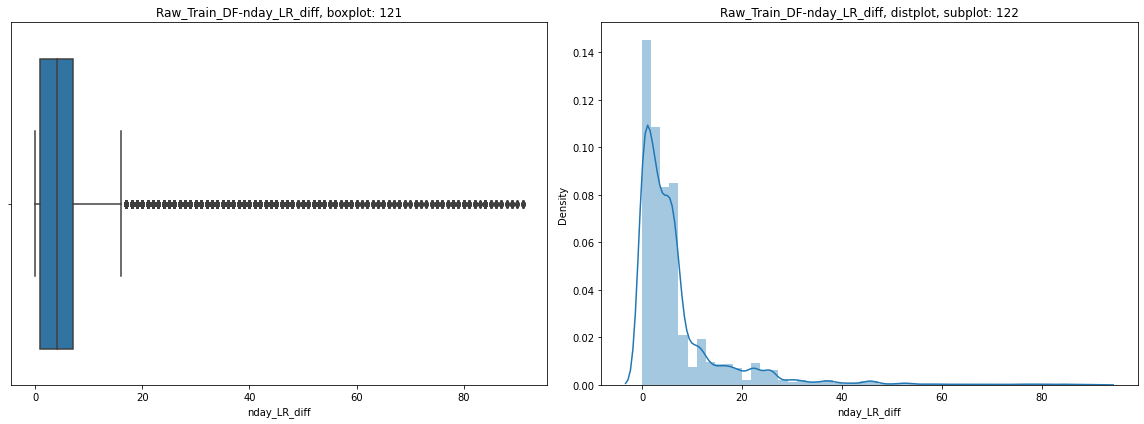

In [36]:
# Plot the Box Plot & Distplot of the Training Set Variables - 'nday_LR_diff'
func_box_distplot(['nday_LR_diff'],raw_train_data, 1, 2, 16, 6)

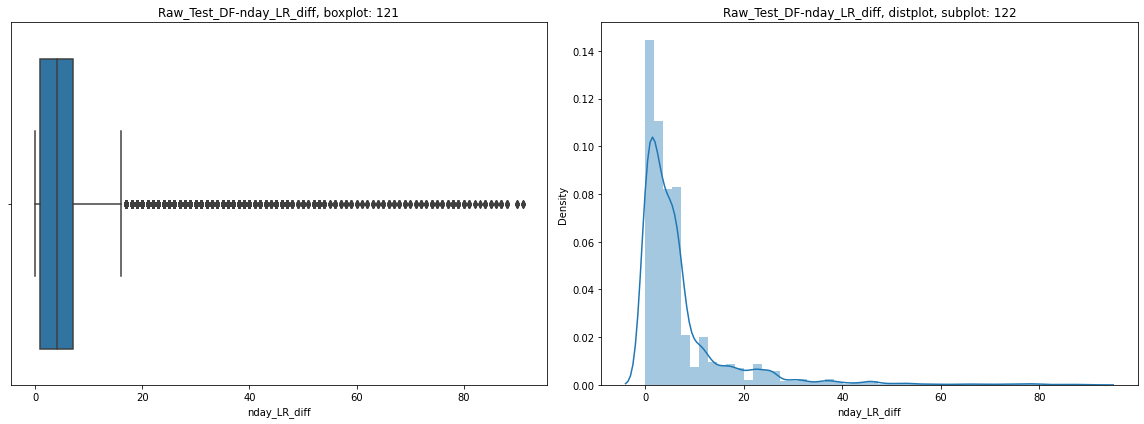

In [37]:
# Plot the Box Plot & Distplot of the Test Set Variables - 'nday_LR_diff'
func_box_distplot(['nday_LR_diff'],raw_test_data, 1, 2, 16, 6)

<hr>

<h4>
<font color=Green>Observation: </font>
</h4>

* Most of the churning happened in the last month i.e. in August 2014 for both given Train & Test data set.

<hr>

<h4>
<font color=Green>Categorical & Numerical Variable Columns Listing </font>
</h4>

In [38]:
# List Unique value column names
unique_value = raw_train_data.nunique().sort_values()
unique_value

churn_probability         2
monthly_2g_6              5
monthly_2g_7              6
monthly_2g_8              6
monthly_3g_6             10
monthly_3g_8             12
monthly_3g_7             13
sachet_3g_6              23
sachet_3g_7              26
sachet_3g_8              28
sachet_2g_6              30
sachet_2g_8              32
sachet_2g_7              33
spl_ic_mou_6             78
nday_LR_diff             92
total_rech_num_8         92
total_rech_num_6         94
spl_ic_mou_8             95
total_rech_num_7         96
spl_ic_mou_7            103
og_others_7             148
last_day_rch_amt_7      166
max_rech_amt_7          178
og_others_8             179
last_day_rch_amt_6      179
max_rech_amt_6          190
last_day_rch_amt_8      191
max_rech_amt_8          202
og_others_6             914
isd_og_mou_8           1008
isd_og_mou_7           1084
isd_og_mou_6           1103
ic_others_6            1523
ic_others_8            1565
ic_others_7            1658
std_og_t2f_mou_8    

In [39]:
unique_value.info()

<class 'pandas.core.series.Series'>
Index: 127 entries, churn_probability to id
Series name: None
Non-Null Count  Dtype
--------------  -----
127 non-null    int64
dtypes: int64(1)
memory usage: 6.1+ KB


In [40]:
## Features with <= 33 unique values can be assumed to be categorical variables other than target variable 'churn_probability'
CAT_list = unique_value[unique_value[unique_value<=33] & unique_value[unique_value>2]].index.to_list()
CONT_list = unique_value[unique_value>33].index.to_list()
raw_train_data[CAT_list].head()

monthly_2g_6  monthly_2g_7  monthly_2g_8  monthly_3g_6  monthly_3g_8  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   monthly_3g_7  sachet_3g_6  sachet_3g_7  sachet_3g_8  sachet_2g_6  \
0             0            0            0            0            0   
1             1            0            0            0            0   
2             0            0            0            0            0   
3             0            0            0            0            0   
4             0            0            1            0            7   

   sachet_2g_8  sachet_2g_7  
0            0            0  
1            0            0  
2            0            0  
3            0            0  
4            6            6

In [41]:
raw_train_data[CONT_list].head()

spl_ic_mou_6  nday_LR_diff  total_rech_num_8  total_rech_num_6  \
0           0.0           7.0                 2                 3   
1           0.0           5.0                 5                 3   
2           0.0           7.0                 2                 2   
3           0.0           6.0                 3                 2   
4           0.0           1.0                 8                13   

   spl_ic_mou_8  total_rech_num_7  spl_ic_mou_7  og_others_7  \
0          0.66                 2           0.0          0.0   
1          0.01                 4           0.0          0.0   
2          0.00                 4           0.0          0.0   
3          0.00                 4           0.0          0.0   
4          0.00                10           0.0          0.0   

   last_day_rch_amt_7  max_rech_amt_7  og_others_8  last_day_rch_amt_6  \
0                  65              65          0.0                  65   
1                   0             145          0.0                   0   
2                  50              70          0.0                  70   
3                 110             110          0.0                 110   
4                  10              41          0.0                  25   

   max_rech_amt_6  last_day_rch_amt_8  max_rech_amt_8  og_others_6  \
0              65                   0              10         0.38   
1               0                   0              50         0.00   
2              70                   0               0         0.00   
3             110                  50              50         0.00   
4              50                  30              30         0.00   

   isd_og_mou_8  isd_og_mou_7  isd_og_mou_6  ic_others_6  ic_others_8  \
0           0.0           0.0           0.0         1.11         0.00   
1           0.0           0.0           0.0         0.00         0.00   
2           0.0           0.0           0.0         0.00         0.25   
3           0.0           0.0           0.0         0.00         0.00   
4           0.0           0.0           0.0         0.00         0.00   

   ic_others_7  std_og_t2f_mou_8  loc_og_t2c_mou_6  std_og_t2f_mou_7  \
0         0.69               0.0              0.00               0.0   
1         0.00               0.0              0.00               0.0   
2         0.00               0.0              2.14               0.0   
3         0.00               0.0              0.00               0.0   
4         0.00               0.0              0.00               0.0   

   std_og_t2f_mou_6  loc_og_t2c_mou_7  total_rech_amt_6  total_rech_amt_7  \
0              0.00              0.00                77                65   
1              0.00             22.01                 0               145   
2              0.00              0.00                70               120   
3              0.56              0.00               160               240   
4              0.00              9.85               290               136   

   total_rech_amt_8  loc_og_t2c_mou_8  std_ic_t2f_mou_8  std_ic_t2f_mou_6  \
0                10              0.00               0.0               0.0   
1                50             29.79               0.0               0.0   
2                 0              0.00               0.0               0.0   
3               130              8.03               0.0               0.0   
4               122              0.00               0.0               0.0   

   std_ic_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_7  loc_og_t2f_mou_6  \
0               0.0              0.00              0.00              0.00   
1               0.0              0.00              0.00              0.00   
2               0.0              0.00              0.00              0.00   
3               0.0              0.00              0.00              0.00   
4               0.0              5.01              1.23             11.99   

    aon  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  roam_ic_mou_7  \
0  1958 

<hr>

<h2>
<font color=Green>Data Imputation </font>
</h2>

<h4>  
<font color=Green>Data Imputaion for Numerical Variables </font>    
</h4>

In [42]:
# Lets fill the null value with median for Train & Test Data Set

# Train Continuous Data Imputation with Median
train_CONT_imputed = raw_train_data[CONT_list].fillna(raw_train_data[CONT_list].median())
train_CONT_imputed.name = 'Train_CONT_Imputed_DF'

# Train Continuous Data Imputation with Median of Train Data Set
test_CONT_imputed = raw_test_data[CONT_list].fillna(raw_train_data[CONT_list].median())
test_CONT_imputed.name = 'Test_CONT_Imputed_DF'

In [43]:
# Display the Head
train_CONT_imputed.head()

spl_ic_mou_6  nday_LR_diff  total_rech_num_8  total_rech_num_6  \
0           0.0           7.0                 2                 3   
1           0.0           5.0                 5                 3   
2           0.0           7.0                 2                 2   
3           0.0           6.0                 3                 2   
4           0.0           1.0                 8                13   

   spl_ic_mou_8  total_rech_num_7  spl_ic_mou_7  og_others_7  \
0          0.66                 2           0.0          0.0   
1          0.01                 4           0.0          0.0   
2          0.00                 4           0.0          0.0   
3          0.00                 4           0.0          0.0   
4          0.00                10           0.0          0.0   

   last_day_rch_amt_7  max_rech_amt_7  og_others_8  last_day_rch_amt_6  \
0                  65              65          0.0                  65   
1                   0             145          0.0                   0   
2                  50              70          0.0                  70   
3                 110             110          0.0                 110   
4                  10              41          0.0                  25   

   max_rech_amt_6  last_day_rch_amt_8  max_rech_amt_8  og_others_6  \
0              65                   0              10         0.38   
1               0                   0              50         0.00   
2              70                   0               0         0.00   
3             110                  50              50         0.00   
4              50                  30              30         0.00   

   isd_og_mou_8  isd_og_mou_7  isd_og_mou_6  ic_others_6  ic_others_8  \
0           0.0           0.0           0.0         1.11         0.00   
1           0.0           0.0           0.0         0.00         0.00   
2           0.0           0.0           0.0         0.00         0.25   
3           0.0           0.0           0.0         0.00         0.00   
4           0.0           0.0           0.0         0.00         0.00   

   ic_others_7  std_og_t2f_mou_8  loc_og_t2c_mou_6  std_og_t2f_mou_7  \
0         0.69               0.0              0.00               0.0   
1         0.00               0.0              0.00               0.0   
2         0.00               0.0              2.14               0.0   
3         0.00               0.0              0.00               0.0   
4         0.00               0.0              0.00               0.0   

   std_og_t2f_mou_6  loc_og_t2c_mou_7  total_rech_amt_6  total_rech_amt_7  \
0              0.00              0.00                77                65   
1              0.00             22.01                 0               145   
2              0.00              0.00                70               120   
3              0.56              0.00               160               240   
4              0.00              9.85               290               136   

   total_rech_amt_8  loc_og_t2c_mou_8  std_ic_t2f_mou_8  std_ic_t2f_mou_6  \
0                10              0.00               0.0               0.0   
1                50             29.79               0.0               0.0   
2                 0              0.00               0.0               0.0   
3               130              8.03               0.0               0.0   
4               122              0.00               0.0               0.0   

   std_ic_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_7  loc_og_t2f_mou_6  \
0               0.0              0.00              0.00              0.00   
1               0.0              0.00              0.00              0.00   
2               0.0              0.00              0.00              0.00   
3               0.0              0.00              0.00              0.00   
4               0.0              5.01              1.23             11.99   

    aon  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  roam_ic_mou_7  \
0  1958 

In [44]:
# Display the Head
test_CONT_imputed.head()

spl_ic_mou_6  nday_LR_diff  total_rech_num_8  total_rech_num_6  \
0          0.54           7.0                 4                 5   
1          0.00           7.0                 5                 5   
2          0.00           3.0                 5                 6   
3          0.00           7.0                 2                 3   
4          0.00           1.0                 8                11   

   spl_ic_mou_8  total_rech_num_7  spl_ic_mou_7  og_others_7  \
0          0.39                 5          0.34          0.0   
1          0.00                 4          0.00          0.0   
2          0.00                 9          0.00          0.0   
3          0.00                 5          0.00          0.0   
4          0.00                 7          0.00          0.0   

   last_day_rch_amt_7  max_rech_amt_7  og_others_8  last_day_rch_amt_6  \
0                  30              30          0.0                  30   
1                   0             250          0.0                 250   
2                   0             500          0.0                   0   
3                 150             150          0.0                 110   
4                 130             130          0.0                  50   

   max_rech_amt_6  last_day_rch_amt_8  max_rech_amt_8  og_others_6  \
0              50                   0              30          0.0   
1             250                   0             250          0.0   
2             300                   0             500          0.0   
3             110                   0               0          0.0   
4              90                 130             130          2.2   

   isd_og_mou_8  isd_og_mou_7  isd_og_mou_6  ic_others_6  ic_others_8  \
0           0.0           0.0           0.0          0.0         0.00   
1           0.8           0.0           0.0          0.0         0.00   
2           0.0           0.0           0.0          0.0         0.00   
3           0.0           0.0           0.0          0.0         0.00   
4           0.0           0.0           0.0          0.0         0.16   

   ic_others_7  std_og_t2f_mou_8  loc_og_t2c_mou_6  std_og_t2f_mou_7  \
0          0.0               0.0               0.0               0.0   
1          0.0               0.0               0.0               0.0   
2          0.0               0.0               0.0               0.0   
3          0.0               0.0               0.0               0.0   
4          0.0               0.0               0.0               0.0   

   std_og_t2f_mou_6  loc_og_t2c_mou_7  total_rech_amt_6  total_rech_amt_7  \
0               0.0              0.00               103                90   
1               0.0              0.00               500               500   
2               0.0              0.00               500              1000   
3               0.0              6.18               110               260   
4               0.0              0.00               356               490   

   total_rech_amt_8  loc_og_t2c_mou_8  std_ic_t2f_mou_8  std_ic_t2f_mou_6  \
0                60              0.03              0.00               0.0   
1               500              0.00              0.00               0.0   
2              1000              0.00              0.00               0.0   
3                 0              0.00              0.00               0.0   
4               546              0.00              1.61               0.0   

   std_ic_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_7  loc_og_t2f_mou_6  \
0               0.0              0.00             13.58              0.00   
1               0.0              0.00              0.00              0.73   
2               0.0              0.00              0.00              0.00   
3               0.0              2.35              0.00              0.00   
4               0.0              0.00              0.00              0.00   

    aon  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  roam_ic_mou_7  \
0  1692 

Let's plot the histogram plots before imputing and after imputing with median values in order to compare, if any significant change is observable.

In [45]:
# Define the Function for Displot & Distplot for two DataFrame(s)

def func_distplot_distplot(target_col,df1, df2, a, b, fxsz, fysz):
#     a = 51  # number of rows
#     b = 2  # number of columns
    c = 1  # initialize plot counter

    fig = plt.figure(figsize=(fxsz,fysz))
    
    for i in target_col:
        plt.subplot(a, b, c)
        plt.title('{}-{}, distplot: {}{}{}'.format(df1.name,i, a, b, c))
        plt.xlabel(i)
        sns.distplot(df1[i])
        c = c + 1
    
        plt.subplot(a, b, c)
        plt.title('{}-{}, distplot, subplot: {}{}{}'.format(df2.name,i, a, b, c))
        plt.xlabel(i)
        sns.distplot(df2[i],color='purple')
        c = c + 1
    
    plt.tight_layout()
    plt.show();

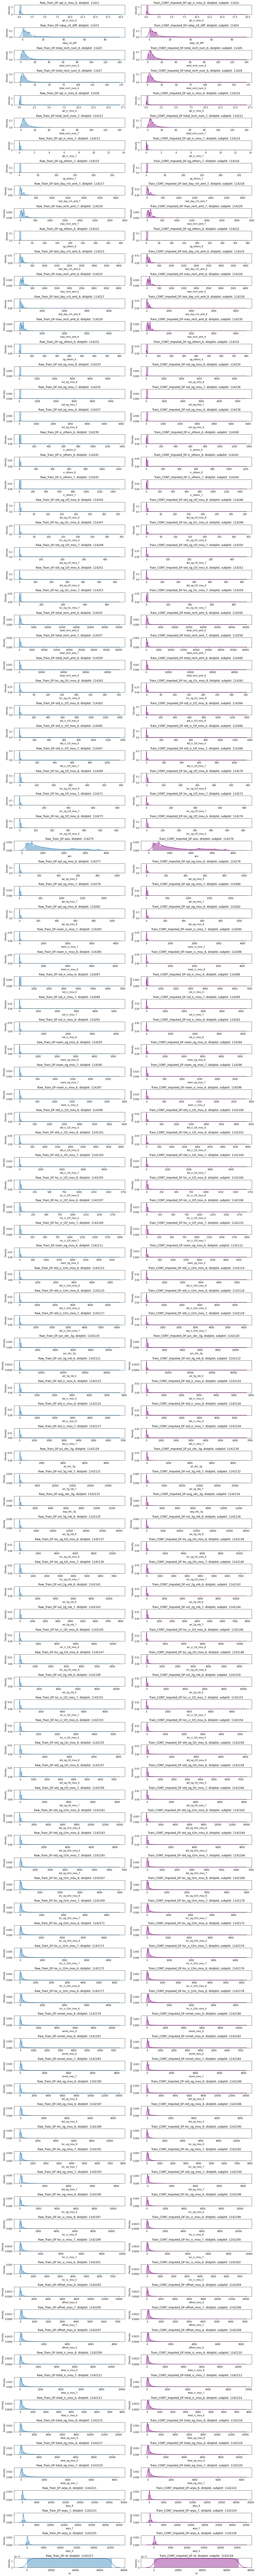

In [46]:
# Plot the Box Plot & Distplot of the Training Set Variables - 'nday_LR_diff'
func_distplot_distplot(CONT_list,raw_train_data, train_CONT_imputed, len(CONT_list), 2, 16, 160)

<hr>

<h4>
<font color=Green>Observation: </font>
</h4>

* Distribution before & after remained more or less same, this imputaion of continuous variable is acceptable to go ahead.

<hr>


<h4>
<font color=Green>Display the stat description for all columns - Continuous Variable </font>
</h4>

In [47]:
# For all Train Imputed Data Set
train_CONT_imputed.describe()

spl_ic_mou_6  nday_LR_diff  total_rech_num_8  total_rech_num_6  \
count  69999.000000  69999.000000      69999.000000      69999.000000   
mean       0.059483      7.022086          7.224932          7.566522   
std        0.161981     10.250515          7.195597          7.041452   
min        0.000000      0.000000          0.000000          0.000000   
25%        0.000000      1.000000          3.000000          3.000000   
50%        0.000000      4.000000          5.000000          6.000000   
75%        0.000000      7.000000          9.000000          9.000000   
max       19.760000     91.000000        138.000000        170.000000   

       spl_ic_mou_8  total_rech_num_7  spl_ic_mou_7   og_others_7  \
count  69999.000000      69999.000000  69999.000000  69999.000000   
mean       0.038255          7.706667      0.032090      0.023487   
std        0.144721          7.050614      0.134813      1.683170   
min        0.000000          0.000000      0.000000      0.000000   
25%        0.000000          3.000000      0.000000      0.000000   
50%        0.000000          6.000000      0.000000      0.000000   
75%        0.000000         10.000000      0.000000      0.000000   
max       16.860000        138.000000     13.460000    270.240000   

       last_day_rch_amt_7  max_rech_amt_7   og_others_8  last_day_rch_amt_6  \
count        69999.000000    69999.000000  69999.000000        69999.000000   
mean            59.294218      104.137573      0.031310           63.426949   
std             95.429492      120.782543      2.172704           97.954876   
min              0.000000        0.000000      0.000000            0.000000   
25%              0.000000       30.000000      0.000000            0.000000   
50%             30.000000      110.000000      0.000000           30.000000   
75%            110.000000      128.000000      0.000000          110.000000   
max           3100.000000     3299.000000    394.930000         4010.000000   

       max_rech_amt_6  last_day_rch_amt_8  max_rech_amt_8   og_others_6  \
count    69999.000000        69999.000000    69999.000000  69999.000000   
mean       104.569265           62.489478      107.540351      0.444289   
std        121.407701          101.996729      124.396750      4.674074   
min          0.000000            0.000000        0.000000      0.000000   
25%         30.000000            0.000000       30.000000      0.000000   
50%        110.000000           30.000000       98.000000      0.000000   
75%        120.000000          130.000000      144.000000      0.000000   
max       4010.000000         4449.000000     4449.000000    800.890000   

       isd_og_mou_8  isd_og_mou_7  isd_og_mou_6   ic_others_6   ic_others_8  \
count  69999.000000  69999.000000  69999.000000  69999.000000  69999.000000   
mean       0.797125      0.779964      0.812319      0.820291      0.912259   
std       28.771385     28.654177     29.153852     11.907671     11.386111   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max     5681.540000   5490.280000   5900.660000   1362.940000   1209.860000   

        ic_others_7  std_og_t2f_mou_8  loc_og_t2c_mou_6  std_og_t2f_mou_7  \
count  69999.000000      69999.000000      69999.000000      69999.000000   
mean       0.980539          1.001784          1.081499          1.042449   
std       12.970528          7.494240          5.631416          8.166510   
min        0.000000          0.000000          0.000000          0.000000   
25%        0.000000          0.000000          0.000000          0.000000   
50%        0.000000          0.000000          0.000000          0.000000   
75%        0.000000          0.000000          0.000000          0.000000   
max     149

<hr>

<h4>
<font color=Green>Observation: </font>
</h4>

* By looking at the stat description, we may drop some of the columns which are having q1, & q3 are are equal to each other.

 <hr>

In [48]:
# Find the column name where 25% quantile & 75% quantile is equal to each other
clmn_to_drop=[]
for i in train_CONT_imputed[CONT_list]:
    if (train_CONT_imputed[i].quantile(0.75) == train_CONT_imputed[i].quantile(0.25)) :
        clmn_to_drop.append(i)
        
clmn_to_drop

['spl_ic_mou_6',
 'spl_ic_mou_8',
 'spl_ic_mou_7',
 'og_others_7',
 'og_others_8',
 'og_others_6',
 'isd_og_mou_8',
 'isd_og_mou_7',
 'isd_og_mou_6',
 'ic_others_6',
 'ic_others_8',
 'ic_others_7',
 'std_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'std_ic_t2f_mou_8',
 'std_ic_t2f_mou_6',
 'std_ic_t2f_mou_7',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'isd_ic_mou_6',
 'isd_ic_mou_7',
 'isd_ic_mou_8',
 'roam_og_mou_8',
 'roam_og_mou_7',
 'roam_ic_mou_6',
 'roam_og_mou_6',
 'jun_vbc_3g',
 'vol_3g_mb_6',
 'jul_vbc_3g',
 'vol_3g_mb_7',
 'aug_vbc_3g',
 'vol_3g_mb_8',
 'vol_2g_mb_8',
 'vol_2g_mb_7',
 'vol_2g_mb_6']

In [49]:
# Temporary Assignment into a dataframe
cont_drop_DF = train_CONT_imputed[clmn_to_drop]
cont_drop_DF.name = 'CONT-Column-Drop-Check'
cont_drop_DF.head()

spl_ic_mou_6  spl_ic_mou_8  spl_ic_mou_7  og_others_7  og_others_8  \
0           0.0          0.66           0.0          0.0          0.0   
1           0.0          0.01           0.0          0.0          0.0   
2           0.0          0.00           0.0          0.0          0.0   
3           0.0          0.00           0.0          0.0          0.0   
4           0.0          0.00           0.0          0.0          0.0   

   og_others_6  isd_og_mou_8  isd_og_mou_7  isd_og_mou_6  ic_others_6  \
0         0.38           0.0           0.0           0.0         1.11   
1         0.00           0.0           0.0           0.0         0.00   
2         0.00           0.0           0.0           0.0         0.00   
3         0.00           0.0           0.0           0.0         0.00   
4         0.00           0.0           0.0           0.0         0.00   

   ic_others_8  ic_others_7  std_og_t2f_mou_8  loc_og_t2c_mou_6  \
0         0.00         0.69               0.0              0.00   
1         0.00         0.00               0.0              0.00   
2         0.25         0.00               0.0              2.14   
3         0.00         0.00               0.0              0.00   
4         0.00         0.00               0.0              0.00   

   std_og_t2f_mou_7  std_og_t2f_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0               0.0              0.00              0.00              0.00   
1               0.0              0.00             22.01             29.79   
2               0.0              0.00              0.00              0.00   
3               0.0              0.56              0.00              8.03   
4               0.0              0.00              9.85              0.00   

   std_ic_t2f_mou_8  std_ic_t2f_mou_6  std_ic_t2f_mou_7  roam_ic_mou_7  \
0               0.0               0.0               0.0            0.0   
1               0.0               0.0               0.0            0.0   
2               0.0               0.0               0.0            0.0   
3               0.0               0.0               0.0            0.0   
4               0.0               0.0               0.0            0.0   

   roam_ic_mou_8  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  roam_og_mou_8  \
0            0.0           0.0           0.0           0.0           0.00   
1            0.0           0.0           0.0           0.0           0.00   
2            0.0           0.0           0.0           0.0           0.00   
3            0.0           0.0           0.0           0.0           1.63   
4            0.0           0.0           0.0           0.0           0.00   

   roam_og_mou_7  roam_ic_mou_6  roam_og_mou_6  jun_vbc_3g  vol_3g_mb_6  \
0            0.0           0.00           0.00         0.0          0.0   
1            0.0           0.00           0.00         0.0          0.0   
2            0.0           0.00           0.00         0.0          0.0   
3            0.0           0.00           0.00         0.0          0.0   
4            0.0          53.64          15.73         0.0          0.0   

   jul_vbc_3g  vol_3g_mb_7  aug_vbc_3g  vol_3g_mb_8  vol_2g_mb_8  vol_2g_mb_7  \
0         0.0         0.00         0.0          0.0         0.00         0.00   
1         0.0         3.96         0.0          0.0         0.00       352.91   
2         0.0         0.00         0.0          0.0         0.00         0.00   
3         0.0         0.00         0.0          0.0         0.00         0.00   
4         0.0         0.00         0.0          0.0       213.47       308.89   

   vol_2g_mb_6  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4        390.8

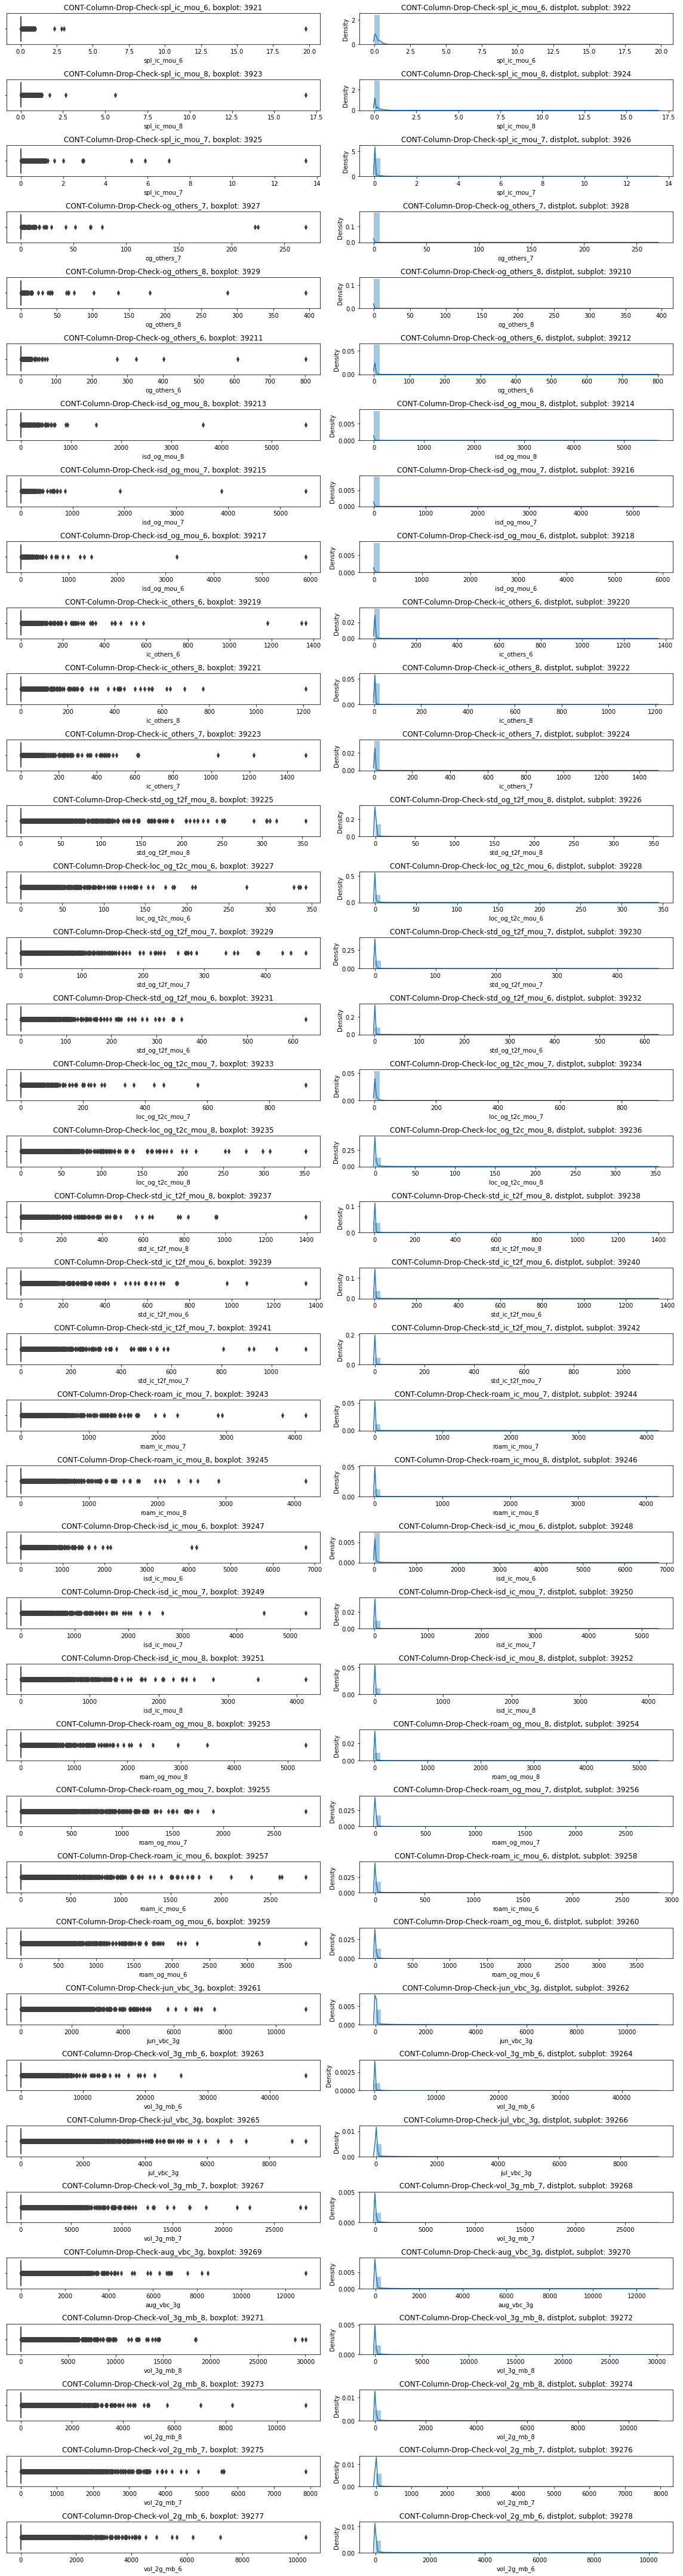

In [50]:
# Let's Check the Distribution of these variable as listed above
func_box_distplot(clmn_to_drop,cont_drop_DF, len(clmn_to_drop), 2, 16, 60)

<hr>

<h4>
<font color=Green>Observation: </font>
</h4>

* Most of the data variables are present as outliers, & this may be dropped off.

 <hr>

<h4>  
<font color=Green>Dropping off these Variables </font>    
</h4>

In [51]:
# From Imputed Train data Set 
train_CONT_imputed.drop(clmn_to_drop, axis=1, inplace=True)

# From Imputed Test data Set 
test_CONT_imputed.drop(clmn_to_drop, axis=1, inplace=True)

In [52]:
# Set the index as id and 
test_CONT_imputed.index = test_CONT_imputed['id']

In [53]:
# Drop the id columns from Test Data Set
test_CONT_imputed.drop(['id'], axis=1, inplace=True)

<h3>  
<font color=Green>Data Imputaion for Categorical Variables </font>    
</h3>

<h4>
<font color=Green>Imputing the missing values in dataframe using KNN Imputer </font>
</h4>

In [54]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

In [55]:
# Initialize the KNN Imputer
imputer = KNNImputer()

In [56]:
%%time
# Impute the Train Categorical Data Columns
df_train_CAT_imputed = pd.DataFrame(imputer.fit_transform(raw_train_data[CAT_list]))

# Impute the Train Categorical Data Columns
df_test_CAT_imputed = pd.DataFrame(imputer.fit_transform(raw_test_data[CAT_list]))

CPU times: total: 46.9 ms
Wall time: 39.6 ms


In [57]:
# Rename the column name
df_train_CAT_imputed.columns = raw_train_data[CAT_list].columns # Imputed CAT Train Data

df_test_CAT_imputed.columns = raw_test_data[CAT_list].columns # Imputed CAT Test Data

In [58]:
df_train_CAT_imputed.index.name='index'

# Display the head
df_train_CAT_imputed.head()

monthly_2g_6  monthly_2g_7  monthly_2g_8  monthly_3g_6  monthly_3g_8  \
index                                                                         
0               0.0           0.0           0.0           0.0           0.0   
1               0.0           0.0           0.0           0.0           0.0   
2               0.0           0.0           0.0           0.0           0.0   
3               0.0           0.0           0.0           0.0           0.0   
4               0.0           0.0           0.0           0.0           0.0   

       monthly_3g_7  sachet_3g_6  sachet_3g_7  sachet_3g_8  sachet_2g_6  \
index                                                                     
0               0.0          0.0          0.0          0.0          0.0   
1               1.0          0.0          0.0          0.0          0.0   
2               0.0          0.0          0.0          0.0          0.0   
3               0.0          0.0          0.0          0.0          0.0   
4               0.0          0.0          1.0          0.0          7.0   

       sachet_2g_8  sachet_2g_7  
index                            
0              0.0          0.0  
1              0.0          0.0  
2              0.0          0.0  
3              0.0          0.0  
4              6.0          6.0

In [59]:
# Display the head
df_test_CAT_imputed.head()

monthly_2g_6  monthly_2g_7  monthly_2g_8  monthly_3g_6  monthly_3g_8  \
0           0.0           0.0           0.0           0.0           0.0   
1           0.0           0.0           0.0           0.0           0.0   
2           0.0           0.0           0.0           0.0           0.0   
3           0.0           0.0           0.0           0.0           0.0   
4           0.0           0.0           0.0           0.0           0.0   

   monthly_3g_7  sachet_3g_6  sachet_3g_7  sachet_3g_8  sachet_2g_6  \
0           0.0          0.0          0.0          0.0          0.0   
1           0.0          0.0          0.0          0.0          0.0   
2           0.0          0.0          0.0          0.0          0.0   
3           0.0          0.0          0.0          0.0          0.0   
4           0.0          0.0          0.0          0.0          0.0   

   sachet_2g_8  sachet_2g_7  
0          0.0          0.0  
1          0.0          0.0  
2          0.0          0.0  
3          0.0          0.0  
4          0.0          0.0

<hr>

<h3>  
<font color=Green>Calculate High Value Customer (HVC)</font>
</h3>

<h4>  
<font color=Red>Calculating High Value Customer (This is tested which yields Recall =0, this is why it is not implemented),</font>
<font color=Red>but for the sake of code testing, it is hereby added as comment part.</font>
<font color=Red>In order to run, please uncomment it.</font>
</h4>

In [60]:
# # PLEASE UNCOMMENT THE BELOW CODE TO IMPLEMENT HVC 
# # Make the id as index and remove the column 'id'
# train_CONT_imputed.index=train_CONT_imputed['id']
# train_CONT_imputed.index.name = 'id'
# train_CONT_imputed.drop(['id'], axis=1, inplace=True)

# # Calculate the Total Average Recharge for the Month 6 & 7
# train_CONT_imputed['TRA_67'] = (train_CONT_imputed['total_rech_amt_6'] + train_CONT_imputed['total_rech_amt_7'])/2

# # Add the churn to the DF
# train_CONT_imputed= pd.merge(train_CONT_imputed, train_churn_only, how='inner', on='id')

# # Add the CAT List Columns
# train_imputed= pd.merge(train_CONT_imputed, df_train_CAT_imputed, how='inner', on='id')

# # Update the Continuos List
# CONT_list = list(train_CONT_imputed.columns)
# CONT_list.remove('churn_probability')
# CONT_list.remove('TRA_67')

# # Plot the Box Plot & Distplot of the Training Set Variables - 'arpu_avg'
# train_CONT_imputed.name = 'train_CONT_imputed_HVC'
# func_box_distplot(['TRA_67'],train_CONT_imputed, 1, 2, 16, 4)

# # HVC may be classified as top 33% customers (67th percentile and beyond)
# HVC_cutoff = train_imputed['TRA_67'].quantile(0.67)
# print("HVC Threshold Value: {0}".format(HVC_cutoff)) # Result: HVC Threshold Value: 342.5

# HVC_DF = train_imputed[train_imputed['TRA_67'] >= HVC_cutoff]

# HVC_DF.shape # Result:(23106, 88)

# # Calculate the percent of chrun in raw train csv file
# churn_perc_HVC = round(HVC_DF['churn_probability'].sum() / HVC_DF.shape[0] * 100, 2)
# print("churn percentage = {0}".format(churn_perc_HVC), '%') # Result:churn percentage = 8.87 %

# # Reassign HVC to Train Imputed Data Set
# train_CONT_imputed = HVC_DF[CONT_list]
# df_train_CAT_imputed = HVC_DF[CAT_list]

# train_CONT_imputed.shape # Result:(23106, 74) Thus no. of churn rows after HVC filter = 23106 * 8.87% = 2049

# # no. of churn rows before HVC filter = 69999 * 10.19% = 7132
# # Thus reduction in no of churn =1 rows = 7132-2049 = 5083
# # Even though reduction in terms of percentage is from 10.19% to 8.87%, but total number of churn only set reduction is by 5083.
# # Further by running the Pycaret multiple classification on HVC filter yields Recall = 0 
# # For this reason, HVC filter is not implemented for the modelling purpose.

<hr>

<h1>
<font color=Green>Exploratory Data Analysis</font>
</h1>

<h4>
<font color=Green>Univariate Analysis - Continuous Variables  </font>
</h4>

In [61]:
# Lets plot the continuos variable of Train set which are not present in clmn_to_drop
clmn_not_to_drop=list(train_CONT_imputed.columns)
clmn_not_to_drop.remove('id')
df_CONT_Train_List2 = train_CONT_imputed[clmn_not_to_drop]
df_CONT_Train_List2.name = 'DF_CONT_Train_List2'

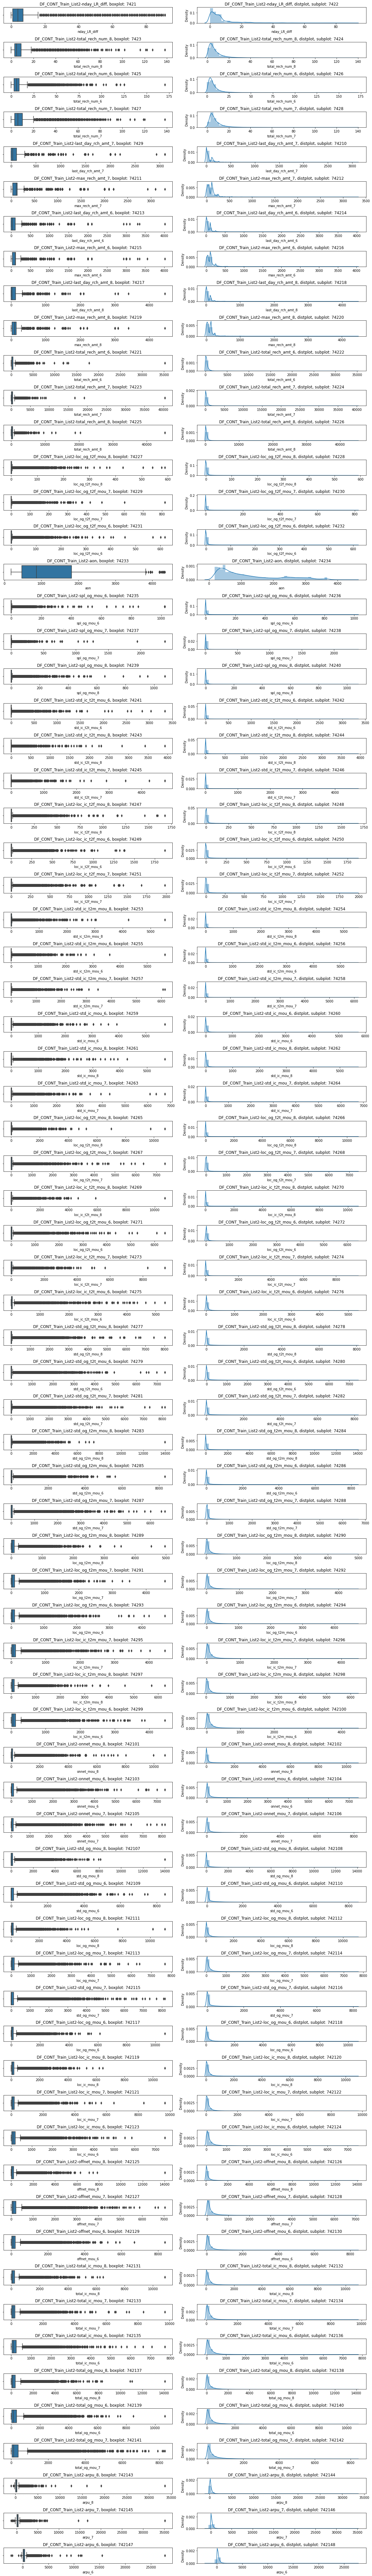

In [62]:
# Plot the Box Plot & Distplot of the Training Set Variables
func_box_distplot(clmn_not_to_drop,df_CONT_Train_List2, len(clmn_not_to_drop), 2, 16, 110)

<hr>

<h4>
<font color=Green>Observation: </font>
</h4>

* Most of the data variables are present as outliers, thus we need to perform the trasformation before proceeding to modelling.

 <hr>

<h4>
<font color=Green>Univariate Analysis - Categorical Variables  </font>
</h4>

<Figure size 1080x2880 with 0 Axes>

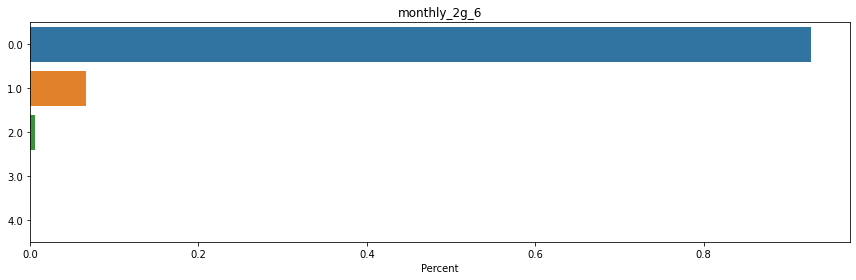

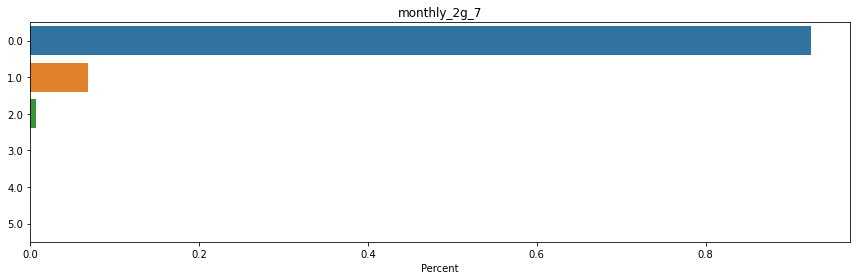

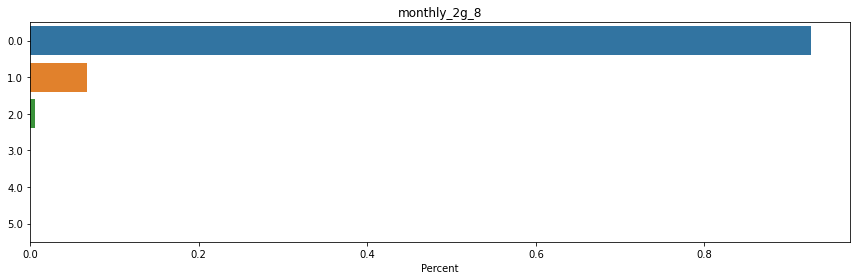

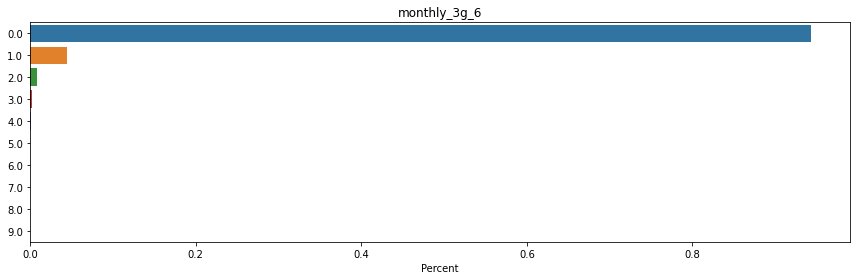

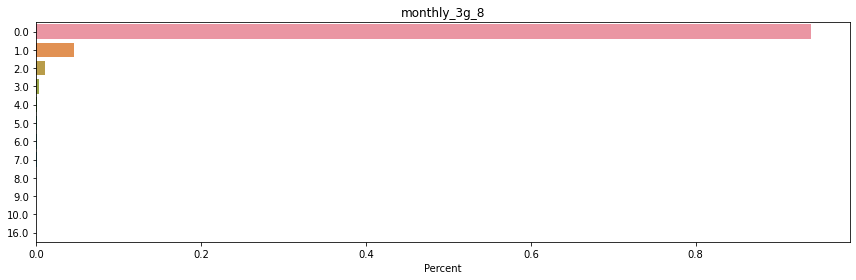

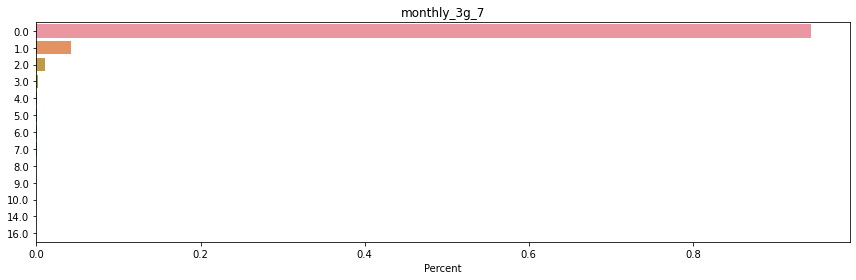

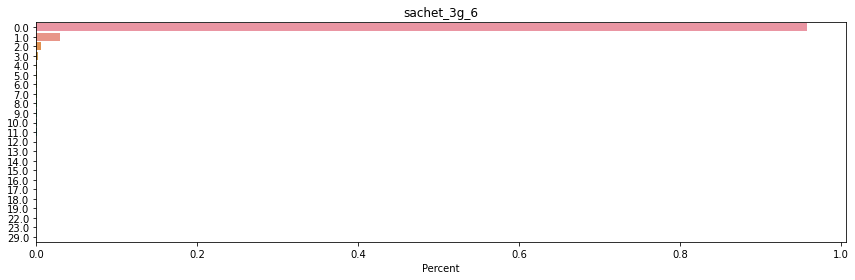

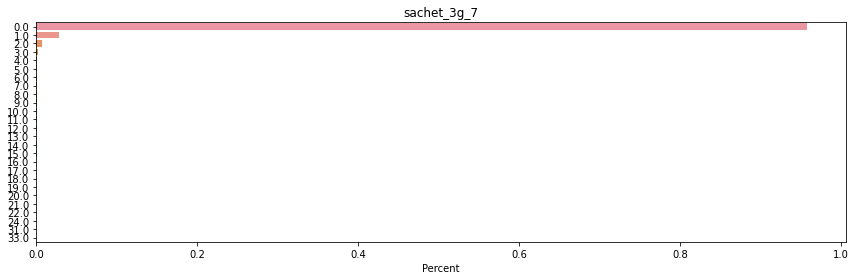

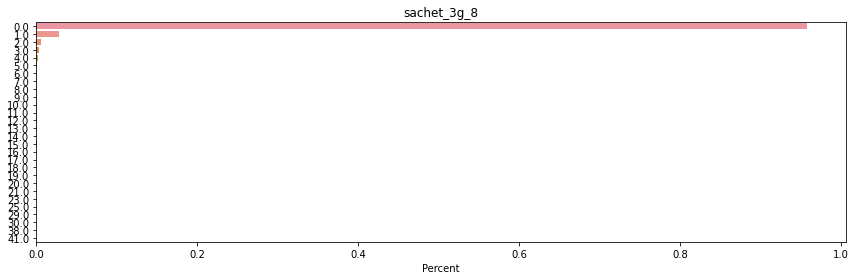

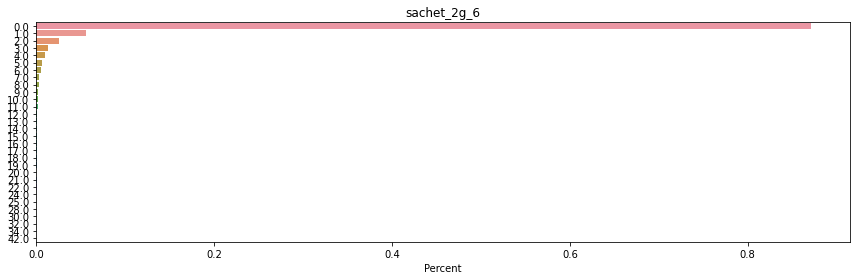

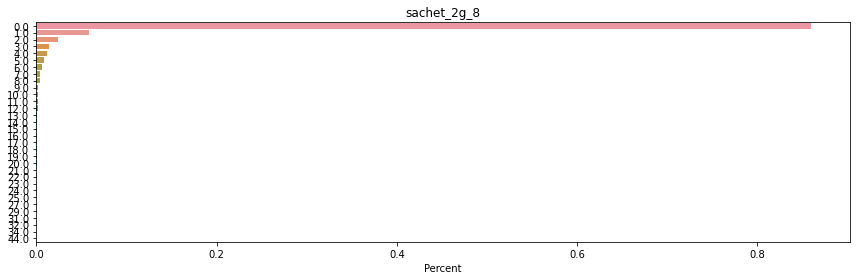

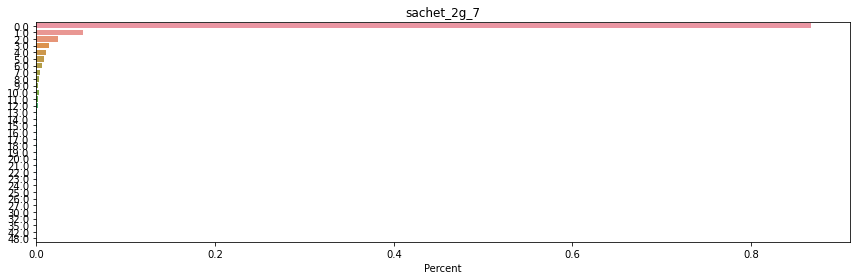

In [63]:
## Data Distribution for categorical features
plt.figure(figsize = (15,40))
for i in CAT_list:
    plt.figure(figsize=(12,4))
    sns.barplot(y = df_train_CAT_imputed[i].value_counts().index, x = df_train_CAT_imputed[i].value_counts(normalize=True)
                ,orient='h')
    plt.title(str(i))
    plt.xlabel('Percent')
    plt.tight_layout()
    plt.show()

<hr>

<h4>
<font color=Green>Observation: </font>
</h4>

* There are mostly no monthly (2G and 3G) & Sachet (2G & 3G) recharge by the user in June-July_August 2014.
* A very low percentage of recharge either monthly or via sachet carried out by the users in all three months.  
 <hr>

<h2>
<font color=Green>Bivariate Analysis of Continuous Variables</font>
</h2>

In [64]:
# Merge the data set based on 'id' for Bivariate Analysis 
df_CONT_Train_List3= pd.merge(train_CONT_imputed, raw_train_data[['id','churn_probability']], how='inner', on='id')
df_CONT_Train_List3.index.name='id'
df_CONT_Train_List3.drop(['id'], axis=1, inplace=True) 

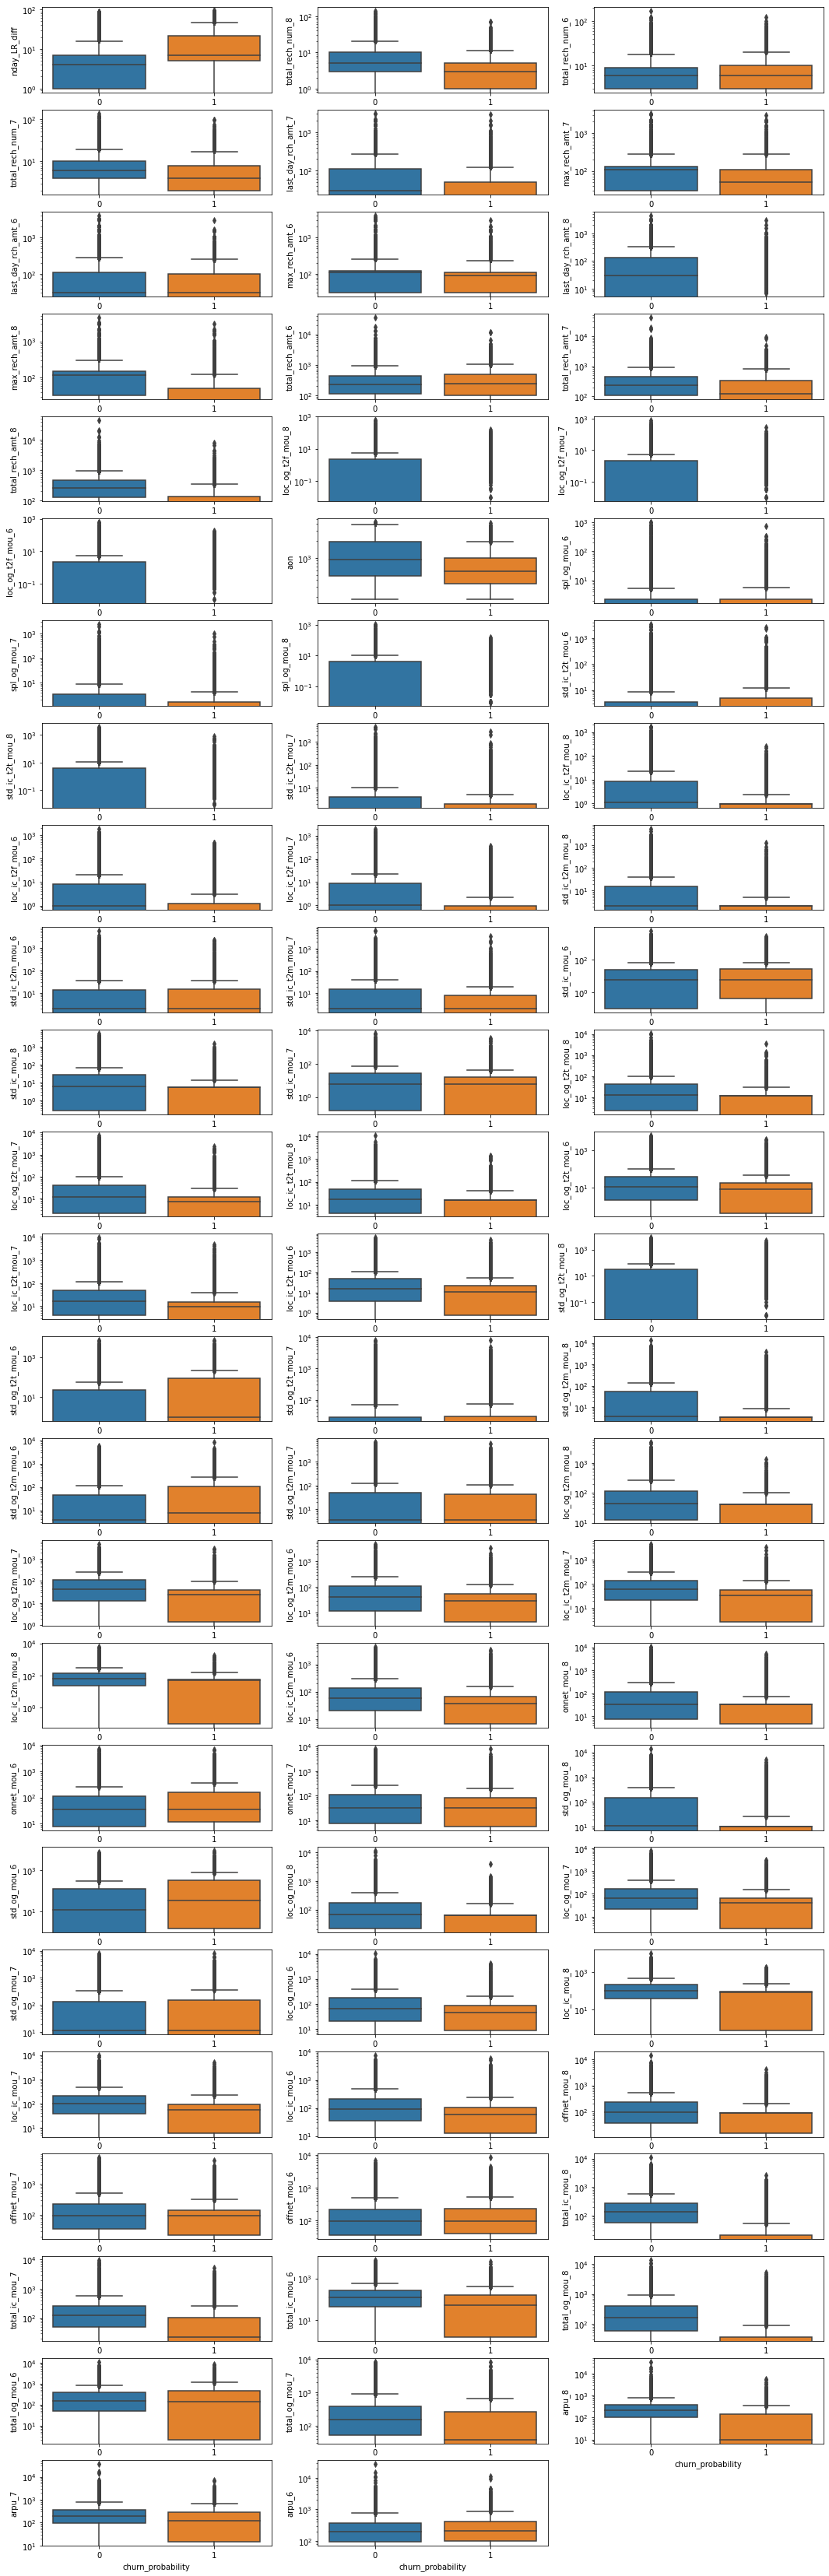

In [65]:
# Box Sub-Plots of the Continuous variables
plt.figure(figsize=(18, 60))

for i in enumerate(clmn_not_to_drop):
    plt.subplot(25,3, i[0]+1)
    sns.boxplot(y=df_CONT_Train_List3[i[1]], x=df_CONT_Train_List3['churn_probability'])
    plt.yscale('log')
plt.show()

<hr>

<h4>
<font color=Green>Observation: </font>
</h4>

* The Box plot of different variables with chruning are easily interpretable. some of the exapmles such where the median of total outgoing 3months call is high, then it is high probability of churing. 
* Median Range of the churning & not churning are more or less similar to each other for most of the varaibles. 

<hr>

<hr>

<h3>
<font color=Green>Outlier Treatment by Power Transformation</font>
</h3>

In [66]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer() # Initialisation

In [67]:
clmn_name = list(train_CONT_imputed.columns)
clmn_name.remove('id')

In [68]:
train_CONT_imputed_df = train_CONT_imputed[clmn_name]

In [69]:
# Display Head before Transformation
train_CONT_imputed_df.head()

nday_LR_diff  total_rech_num_8  total_rech_num_6  total_rech_num_7  \
0           7.0                 2                 3                 2   
1           5.0                 5                 3                 4   
2           7.0                 2                 2                 4   
3           6.0                 3                 2                 4   
4           1.0                 8                13                10   

   last_day_rch_amt_7  max_rech_amt_7  last_day_rch_amt_6  max_rech_amt_6  \
0                  65              65                  65              65   
1                   0             145                   0               0   
2                  50              70                  70              70   
3                 110             110                 110             110   
4                  10              41                  25              50   

   last_day_rch_amt_8  max_rech_amt_8  total_rech_amt_6  total_rech_amt_7  \
0                   0              10                77                65   
1                   0              50                 0               145   
2                   0               0                70               120   
3                  50              50               160               240   
4                  30              30               290               136   

   total_rech_amt_8  loc_og_t2f_mou_8  loc_og_t2f_mou_7  loc_og_t2f_mou_6  \
0                10              0.00              0.00              0.00   
1                50              0.00              0.00              0.00   
2                 0              0.00              0.00              0.00   
3               130              0.00              0.00              0.00   
4               122              5.01              1.23             11.99   

    aon  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  std_ic_t2t_mou_6  \
0  1958          8.20          0.63          0.00              0.00   
1   710          0.00         30.73         31.66              0.00   
2   882          2.89          1.38          0.00             11.69   
3   982         14.95          9.13         25.61              0.00   
4   647          0.00         17.00          0.00              0.00   

   std_ic_t2t_mou_8  std_ic_t2t_mou_7  loc_ic_t2f_mou_8  loc_ic_t2f_mou_6  \
0              0.21              7.61              0.00              0.00   
1              0.00              0.00              3.40              0.35   
2              0.00              0.00              0.00              0.00   
3              0.00              0.00              0.00              7.23   
4              0.00              0.00              6.14              5.51   

   loc_ic_t2f_mou_7  std_ic_t2m_mou_8  std_ic_t2m_mou_6  std_ic_t2m_mou_7  \
0              0.00             14.96              7.46             19.96   
1              1.66              0.00              0.00              0.00   
2              0.00              6.38             18.21              2.48   
3              0.81              2.81              8.89              0.28   
4              3.63              0.00              0.00              0.00   

   std_ic_mou_6  std_ic_mou_8  std_ic_mou_7  loc_og_t2t_mou_8  \
0          7.46         15.18         27.58              0.28   
1          0.00          0.00          0.00              0.00   
2         29.91          6.38          2.48              0.00   
3          8.89          2.81          0.28              0.00   
4          0.00          0.00          0.00              6.13   

   loc_og_t2t_mou_7  loc_ic_t2t_mou_8  loc_og_t2t_mou_6  loc_ic_t2t_mou_7  \
0              0.00              7.79              2.23              3.68   
1              0.00             10.53              0.00             19.09   
2             12.98              6.49              0.53              6.16   
3              3.94             23.88              6.99              4.84   
4              4.83              2.66         

In [70]:
# Power Transformation of Train Set Data
train_CONT_imputed_df_pt = pd.DataFrame(pt.fit_transform(train_CONT_imputed_df),index=train_CONT_imputed_df.index)
train_CONT_imputed_df_pt.columns = train_CONT_imputed_df.columns
train_CONT_imputed_df_pt.index.name='id'
train_CONT_imputed_df_pt.name = 'train_CONT_imputed_df_pt'

# Display Head after Transformation
train_CONT_imputed_df_pt.head()

nday_LR_diff  total_rech_num_8  total_rech_num_6  total_rech_num_7  \
id                                                                       
0       0.542051         -0.956570         -0.753041         -1.225995   
1       0.259847         -0.046853         -0.753041         -0.468296   
2       0.542051         -0.956570         -1.176527         -0.468296   
3       0.411835         -0.580357         -1.176527         -0.468296   
4      -0.876926          0.490491          1.064835          0.693281   

    last_day_rch_amt_7  max_rech_amt_7  last_day_rch_amt_6  max_rech_amt_6  \
id                                                                           
0             0.665431       -0.075248            0.552413       -0.102353   
1            -1.287218        0.672846           -1.410041       -1.936172   
2             0.514342       -0.014660            0.601862       -0.040303   
3             0.984920        0.391192            0.919402        0.376328   
4            -0.292629       -0.418182           -0.023247       -0.309060   

    last_day_rch_amt_8  max_rech_amt_8  total_rech_amt_6  total_rech_amt_7  \
id                                                                           
0            -1.260799       -1.115467         -0.667291         -0.711825   
1            -1.260799       -0.264668         -1.922594         -0.240953   
2            -1.260799       -1.804888         -0.718429         -0.363754   
3             0.517811       -0.264668         -0.213138          0.126658   
4             0.251566       -0.591056          0.250538         -0.283411   

    total_rech_amt_8  loc_og_t2f_mou_8  loc_og_t2f_mou_7  loc_og_t2f_mou_6  \
id                                                                           
0          -1.355919         -0.736818         -0.749535         -0.744538   
1          -0.799005         -0.736818         -0.749535         -0.744538   
2          -1.818318         -0.736818         -0.749535         -0.744538   
3          -0.287189         -0.736818         -0.749535         -0.744538   
4          -0.326556          1.534211          0.801548          1.701334   

         aon  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  std_ic_t2t_mou_6  \
id                                                                         
0   0.959277      1.595055      0.109851     -0.821840         -0.754175   
1  -0.272129     -0.753984      1.702085      1.697113         -0.754175   
2  -0.010181      1.240479      0.595563     -0.821840          1.525434   
3   0.119789      1.697353      1.482935      1.670805         -0.754175   
4  -0.384096     -0.753984      1.620113     -0.821840         -0.754175   

    std_ic_t2t_mou_8  std_ic_t2t_mou_7  loc_ic_t2f_mou_8  loc_ic_t2f_mou_6  \
id                                                                           
0          -0.354186          1.394629         -1.034701         -1.011660   
1          -0.748631         -0.759059          0.566882         -0.596597   
2          -0.748631         -0.759059         -1.034701         -1.011660   
3          -0.748631         -0.759059         -1.034701          0.952802   
4          -0.748631         -0.759059          0.884653          0.819589   

    loc_ic_t2f_mou_7  std_ic_t2m_mou_8  std_ic_t2m_mou_6  std_ic_t2m_mou_7  \
id                                                                           
0          -1.021068          0.965142          0.633053          1.066199   
1           0.134138         -1.096390         -1.091903         -1.087450   
2          -1.021068          0.556934          1.046722          0.037184   
3          -0.257420          0.119548          0.720097         -0.829965   
4           0.585280         -1.096390         -1.091903         -1.087450   

    std_ic_mou_6  std_ic_mou_8  std_ic_mou_7  loc_og_t2t_mou_8  \
id                                                               
0       0.202765      0.572626      0.853545         -1.349218   
1      -1.276740   

In [71]:
# Display Head before Transformation
test_CONT_imputed.head()

nday_LR_diff  total_rech_num_8  total_rech_num_6  total_rech_num_7  \
id                                                                          
69999           7.0                 4                 5                 5   
70000           7.0                 5                 5                 4   
70001           3.0                 5                 6                 9   
70002           7.0                 2                 3                 5   
70003           1.0                 8                11                 7   

       last_day_rch_amt_7  max_rech_amt_7  last_day_rch_amt_6  max_rech_amt_6  \
id                                                                              
69999                  30              30                  30              50   
70000                   0             250                 250             250   
70001                   0             500                   0             300   
70002                 150             150                 110             110   
70003                 130             130                  50              90   

       last_day_rch_amt_8  max_rech_amt_8  total_rech_amt_6  total_rech_amt_7  \
id                                                                              
69999                   0              30               103                90   
70000                   0             250               500               500   
70001                   0             500               500              1000   
70002                   0               0               110               260   
70003                 130             130               356               490   

       total_rech_amt_8  loc_og_t2f_mou_8  loc_og_t2f_mou_7  loc_og_t2f_mou_6  \
id                                                                              
69999                60              0.00             13.58              0.00   
70000               500              0.00              0.00              0.73   
70001              1000              0.00              0.00              0.00   
70002                 0              2.35              0.00              0.00   
70003               546              0.00              0.00              0.00   

        aon  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  std_ic_t2t_mou_6  \
id                                                                        
69999  1692          0.00          0.00          0.03              0.00   
70000  2533          0.00          0.00          0.00              0.00   
70001   277          0.00          0.00          0.00              0.00   
70002  1244          0.00         12.03          1.15              0.00   
70003   462          0.71          5.39          4.96             29.71   

       std_ic_t2t_mou_8  std_ic_t2t_mou_7  loc_ic_t2f_mou_8  loc_ic_t2f_mou_6  \
id                                                                              
69999              0.00              0.00              0.00              0.26   
70000              0.00              0.00              0.00              1.49   
70001              0.00              0.00              0.00              0.00   
70002              0.00              4.26              1.64              0.00   
70003            107.39             92.36              0.00              0.00   

       loc_ic_t2f_mou_7  std_ic_t2m_mou_8  std_ic_t2m_mou_6  std_ic_t2m_mou_7  \
id                                                                              
69999              0.00              4.34              0.36              1.04   
70000              0.00              0.00              0.00             12.51   
70001              0.00              0.00              0.00              0.00   
70002              0.38              8.83              9.63             11.88   
70003              0.00             32.46             13.88             13.96   

       std_ic_mou_6  std_ic_mou_8  std_ic_mou_7  loc_og_t2t_mou_8  \
id                              

In [72]:
# Power Transformation of Test Set Data
test_CONT_imputed_df_pt = pd.DataFrame(pt.fit_transform(test_CONT_imputed),index=test_CONT_imputed.index)
test_CONT_imputed_df_pt.columns = test_CONT_imputed.columns
test_CONT_imputed_df_pt.index.name='id'
test_CONT_imputed_df_pt.name = 'test_CONT_imputed_df_pt'
# Display Head after Transformation
test_CONT_imputed_df_pt.head()

nday_LR_diff  total_rech_num_8  total_rech_num_6  total_rech_num_7  \
id                                                                          
69999      0.536432         -0.275741         -0.157065         -0.189617   
70000      0.536432         -0.037475         -0.157065         -0.458823   
70001     -0.149718         -0.037475          0.066786          0.560212   
70002      0.536432         -0.937858         -0.747853         -0.189617   
70003     -0.877387          0.496108          0.846233          0.233466   

       last_day_rch_amt_7  max_rech_amt_7  last_day_rch_amt_6  max_rech_amt_6  \
id                                                                              
69999            0.237120       -0.619161            0.102882       -0.308791   
70000           -1.283628        1.284746            1.567629        1.324084   
70001           -1.283628        2.269230           -1.387761        1.575823   
70002            1.180019        0.693178            0.931143        0.373699   
70003            1.087880        0.545003            0.404153        0.181054   

       last_day_rch_amt_8  max_rech_amt_8  total_rech_amt_6  total_rech_amt_7  \
id                                                                              
69999           -1.259748       -0.576497         -0.494611         -0.536551   
70000           -1.259748        1.233263          0.772163          0.780442   
70001           -1.259748        2.168234          0.772163          1.564332   
70002           -1.259748       -1.797851         -0.454507          0.188436   
70003            1.059125        0.530397          0.439012          0.760173   

       total_rech_amt_8  loc_og_t2f_mou_8  loc_og_t2f_mou_7  loc_og_t2f_mou_6  \
id                                                                              
69999         -0.703412         -0.736627          1.710514         -0.746060   
70000          0.774595         -0.736627         -0.751299          0.460714   
70001          1.528365         -0.736627         -0.751299         -0.746060   
70002         -1.807665          1.219778         -0.751299         -0.746060   
70003          0.861090         -0.736627         -0.751299         -0.746060   

            aon  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  std_ic_t2t_mou_6  \
id                                                                            
69999  0.786955     -0.760352     -0.815842     -0.754107         -0.755542   
70000  1.272968     -0.760352     -0.815842     -0.819841         -0.755542   
70001 -1.390198     -0.760352     -0.815842     -0.819841         -0.755542   
70002  0.416549     -0.760352      1.537027      0.447866         -0.755542   
70003 -0.775480      0.374940      1.289007      1.250339          1.678240   

       std_ic_t2t_mou_8  std_ic_t2t_mou_7  loc_ic_t2f_mou_8  loc_ic_t2f_mou_6  \
id                                                                              
69999         -0.750947         -0.759149         -1.031281         -0.685833   
70000         -0.750947         -0.759149         -1.031281          0.087580   
70001         -0.750947         -0.759149         -1.031281         -1.011966   
70002         -0.750947          1.167317          0.137894         -1.011966   
70003          1.772213          1.755134         -1.031281         -1.011966   

       loc_ic_t2f_mou_7  std_ic_t2m_mou_8  std_ic_t2m_mou_6  std_ic_t2m_mou_7  \
id                                                                              
69999         -1.021709          0.352057         -0.765323         -0.382863   
70000         -1.021709         -1.097063         -1.088846          0.875080   
70001         -1.021709         -1.097063         -1.088846         -1.083868   
70002         -0.584362          0.718134          0.760709          0.851520   
70003         -1.021709          1.272733          0.930351          0.924227   

       std_ic_mou_6  std_ic_mou_8  std_ic_mou_7  loc_og_t2t_mou_8  \
id  

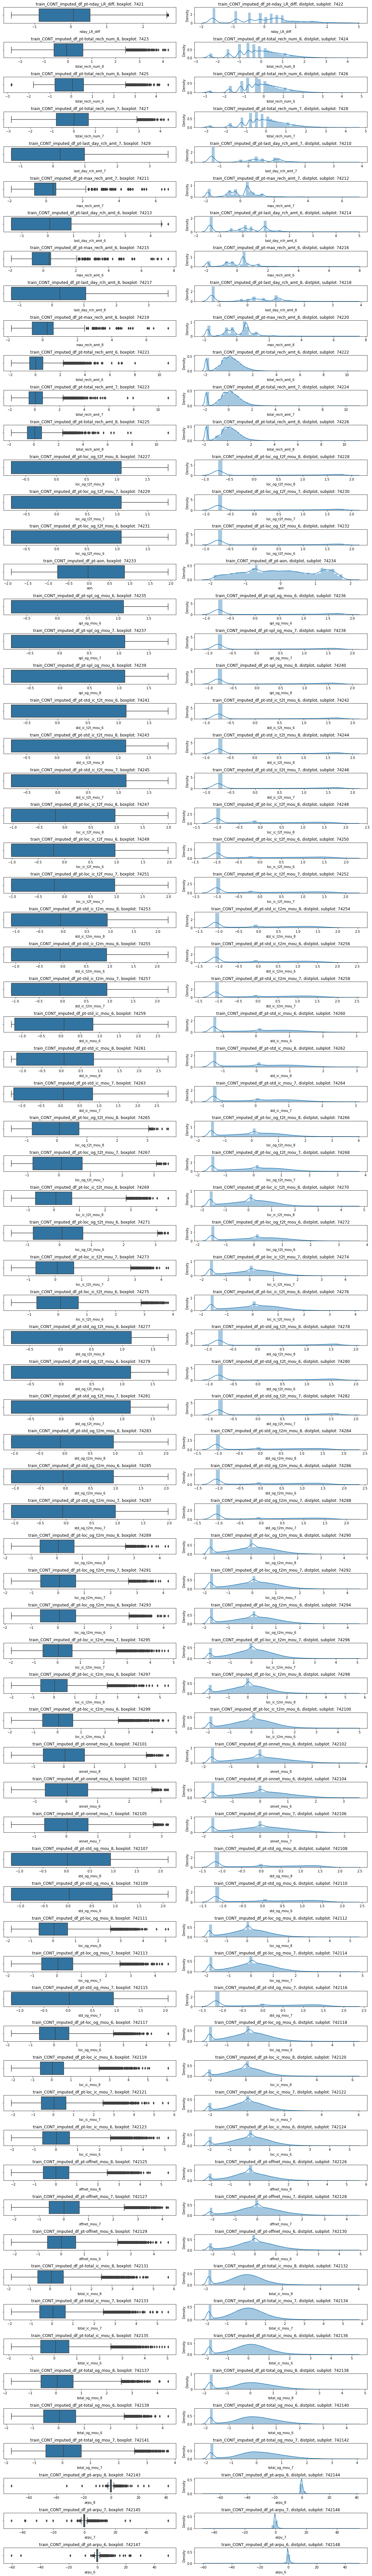

In [73]:
# Plot the Box Plot & Distplot of the Training Set Variables
func_box_distplot(list(train_CONT_imputed_df_pt.columns),train_CONT_imputed_df_pt, 
                  len(list(train_CONT_imputed_df_pt.columns)), 2, 16, 110)

<hr>

<h4>
<font color=Green>Observation: </font>
</h4>

* Data Variables are now more or less normally distributed and having much reduced outliers.

<hr>

<hr>

<h4>
<font color=Green>Correlation Matrix & Heat Map</font>
</h4>

In [74]:
# Correlation Matrix
corr = round(train_CONT_imputed_df_pt.corr(),2)
corr

nday_LR_diff  total_rech_num_8  total_rech_num_6  \
nday_LR_diff                1.00             -0.69             -0.27   
total_rech_num_8           -0.69              1.00              0.41   
total_rech_num_6           -0.27              0.41              1.00   
total_rech_num_7           -0.42              0.64              0.57   
last_day_rch_amt_7         -0.13              0.14              0.11   
max_rech_amt_7             -0.05              0.03              0.05   
last_day_rch_amt_6          0.00             -0.04              0.21   
max_rech_amt_6              0.07             -0.12              0.26   
last_day_rch_amt_8         -0.19              0.20              0.05   
max_rech_amt_8             -0.20              0.25             -0.01   
total_rech_amt_6           -0.13              0.16              0.69   
total_rech_amt_7           -0.27              0.37              0.37   
total_rech_amt_8           -0.47              0.65              0.24   
loc_og_t2f_mou_8           -0.01              0.01             -0.00   
loc_og_t2f_mou_7            0.03             -0.04              0.03   
loc_og_t2f_mou_6            0.07             -0.10              0.07   
aon                         0.08             -0.11             -0.06   
spl_og_mou_6               -0.09              0.14              0.34   
spl_og_mou_7               -0.16              0.25              0.24   
spl_og_mou_8               -0.24              0.38              0.18   
std_ic_t2t_mou_6           -0.09              0.11              0.26   
std_ic_t2t_mou_8           -0.19              0.27              0.10   
std_ic_t2t_mou_7           -0.14              0.19              0.16   
loc_ic_t2f_mou_8            0.02             -0.00              0.04   
loc_ic_t2f_mou_6            0.06             -0.07              0.07   
loc_ic_t2f_mou_7            0.05             -0.04              0.06   
std_ic_t2m_mou_8           -0.15              0.21              0.09   
std_ic_t2m_mou_6           -0.07              0.08              0.22   
std_ic_t2m_mou_7           -0.11              0.15              0.14   
std_ic_mou_6               -0.06              0.07              0.23   
std_ic_mou_8               -0.14              0.21              0.09   
std_ic_mou_7               -0.10              0.15              0.15   
loc_og_t2t_mou_8           -0.11              0.19              0.13   
loc_og_t2t_mou_7           -0.06              0.10              0.18   
loc_ic_t2t_mou_8           -0.07              0.14              0.12   
loc_og_t2t_mou_6           -0.02              0.02              0.26   
loc_ic_t2t_mou_7           -0.04              0.08              0.16   
loc_ic_t2t_mou_6           -0.01              0.02              0.22   
std_og_t2t_mou_8           -0.29              0.39              0.13   
std_og_t2t_mou_6           -0.14              0.17              0.34   
std_og_t2t_mou_7           -0.22              0.29              0.21   
std_og_t2m_mou_8           -0.26              0.36              0.12   
std_og_t2m_mou_6           -0.13              0.15              0.33   
std_og_t2m_mou_7           -0.19              0.25              0.20   
loc_og_t2m_mou_8           -0.13              0.21              0.14   
loc_og_t2m_mou_7           -0.07              0.11              0.20   
loc_og_t2m_mou_6           -0.01              0.01              0.29   
loc_ic_t2m_mou_7           -0.04              0.09              0.19   
loc_ic_t2m_mou_8           -0.09              0.16              0.14   
loc_ic_t2m_mou_6           -0.00              0.01              0.25   
onnet_mou_8                -0.25              0.37              0.18   
onnet_mou_6                -0.11              0.13              0.40   
onnet_mou_7                -0.18              0.25              0.27   
std_og_mou_8               -0.27              0.38              0.13   
std_og_mou_6               -0.14              0.16          

Let's plot the heat map of all the variables of Train Continuous Data Set:

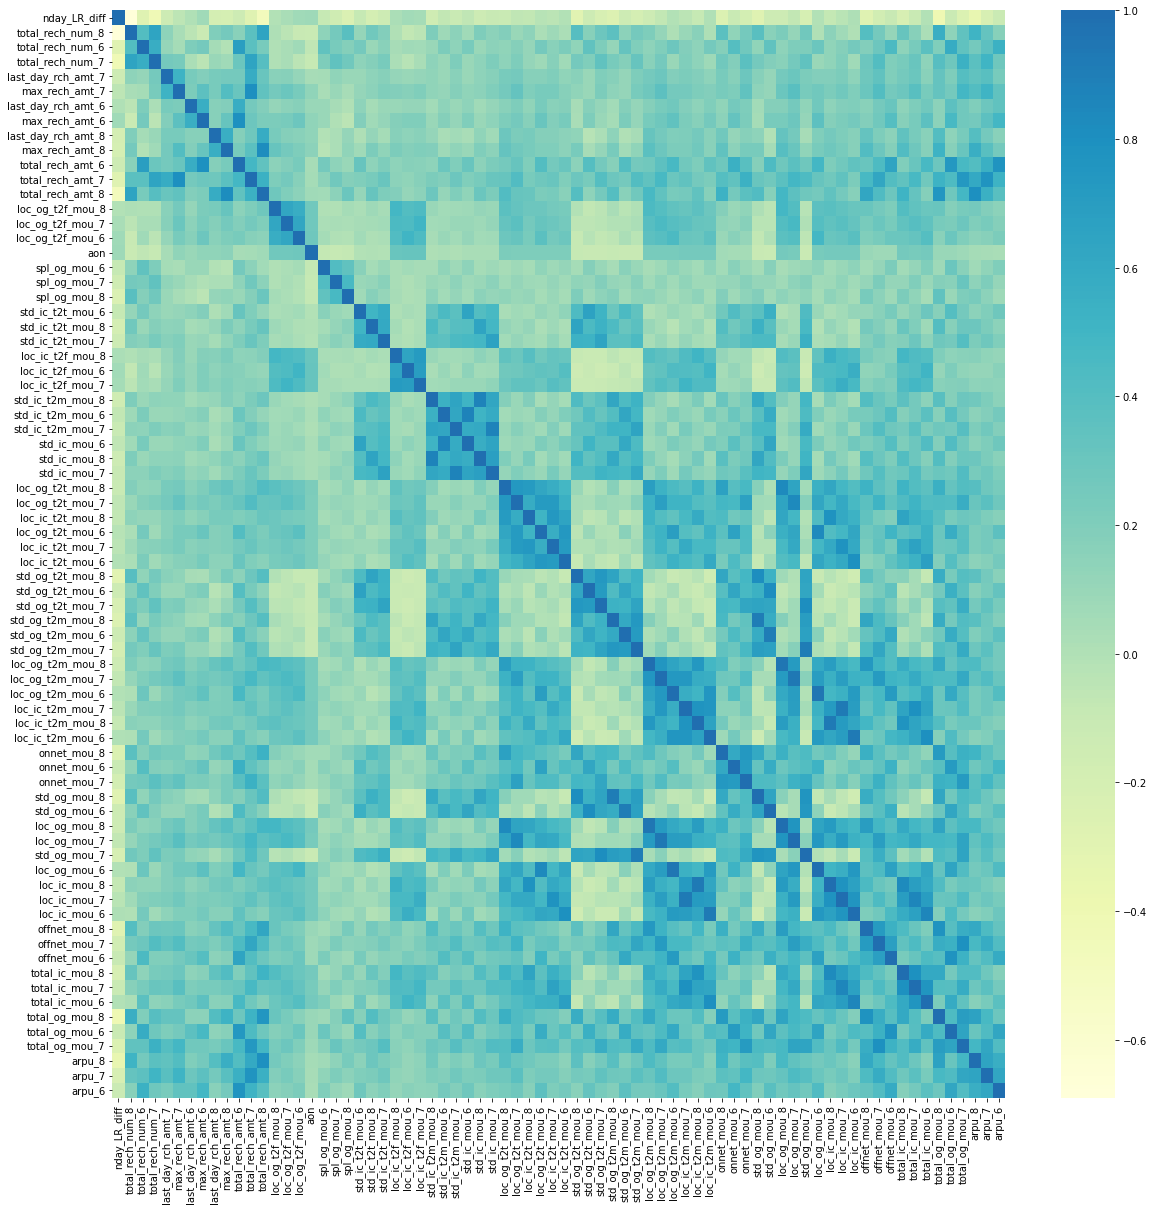

In [75]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=False, center=0.5, cmap="YlGnBu")
plt.show()

<hr>

<h4>
<font color=Green>Observation: </font>
</h4>

* Most of the features are not highly correlated. 

<hr>

<hr>

<h3>
<font color=Green>Encoding Categorical Features - Creating Dummy Variables</font>
</h3>

In [76]:
# Train CAT Data Set
df_train_CAT_imputed = df_train_CAT_imputed.astype(str)
df_train_CAT_imputed.index.name = 'id'
df_train_CAT_imputed.shape

(69999, 12)

In [77]:
df_train_CAT_imputed.index.max()

69998

In [78]:
# Test CAT Data Set
df_test_CAT_imputed = df_test_CAT_imputed.astype(str)
df_test_CAT_imputed.index=test_CONT_imputed_df_pt.index
df_test_CAT_imputed.shape

(30000, 12)

In [79]:
# Concatenate both Train & Test Data
df_CAT_imputed_merge = pd.concat([df_train_CAT_imputed, df_test_CAT_imputed])
df_CAT_imputed_merge.shape

(99999, 12)

In [80]:
#convert categorical variable into dummy
df_CAT_imputed_merge_dummy = pd.get_dummies(df_CAT_imputed_merge)
df_CAT_imputed_merge_dummy.shape

(99999, 238)

In [81]:
df_CAT_imputed_merge_dummy.head()

monthly_2g_6_0.0  monthly_2g_6_1.0  monthly_2g_6_2.0  monthly_2g_6_3.0  \
id                                                                           
0                  1                 0                 0                 0   
1                  1                 0                 0                 0   
2                  1                 0                 0                 0   
3                  1                 0                 0                 0   
4                  1                 0                 0                 0   

    monthly_2g_6_4.0  monthly_2g_7_0.0  monthly_2g_7_1.0  monthly_2g_7_2.0  \
id                                                                           
0                  0                 1                 0                 0   
1                  0                 1                 0                 0   
2                  0                 1                 0                 0   
3                  0                 1                 0                 0   
4                  0                 1                 0                 0   

    monthly_2g_7_3.0  monthly_2g_7_4.0  monthly_2g_7_5.0  monthly_2g_8_0.0  \
id                                                                           
0                  0                 0                 0                 1   
1                  0                 0                 0                 1   
2                  0                 0                 0                 1   
3                  0                 0                 0                 1   
4                  0                 0                 0                 1   

    monthly_2g_8_1.0  monthly_2g_8_2.0  monthly_2g_8_3.0  monthly_2g_8_4.0  \
id                                                                           
0                  0                 0                 0                 0   
1                  0                 0                 0                 0   
2                  0                 0                 0                 0   
3                  0                 0                 0                 0   
4                  0                 0                 0                 0   

    monthly_2g_8_5.0  monthly_3g_6_0.0  monthly_3g_6_1.0  monthly_3g_6_11.0  \
id                                                                            
0                  0                 1                 0                  0   
1                  0                 1                 0                  0   
2                  0                 1                 0                  0   
3                  0                 1                 0                  0   
4                  0                 1                 0                  0   

    monthly_3g_6_14.0  monthly_3g_6_2.0  monthly_3g_6_3.0  monthly_3g_6_4.0  \
id                                                                            
0                   0                 0                 0                 0   
1                   0                 0                 0                 0   
2                   0                 0                 0                 0   
3                   0                 0                 0                 0   
4                   0                 0                 0                 0   

    monthly_3g_6_5.0  monthly_3g_6_6.0  monthly_3g_6_7.0  monthly_3g_6_8.0  \
id                                                                           
0                  0                 0                 0                 0   
1                  0                 0                 0                 0   
2                  0                 0                 0                 0   
3                  0                 0                 0                 0   
4                  0                 0                 0                 0   

    monthly_3g_6_9.0  monthly_3g_8_0.0  monthly_3g_8_1.0  monthly_3g_8_10.0  \
id                                                                            
0  

In [82]:
# Seperate the Train CAT dummy from merged DF
df_train_CAT_imputed_dummy = df_CAT_imputed_merge_dummy[df_CAT_imputed_merge_dummy.index<69999]
df_train_CAT_imputed_dummy.shape

(69999, 238)

In [83]:
# Seperate the Test CAT dummy from merged DF
df_test_CAT_imputed_dummy = df_CAT_imputed_merge_dummy[df_CAT_imputed_merge_dummy.index>=69999]
df_test_CAT_imputed_dummy.shape

(30000, 238)

<hr>

<h4>
<font color=Green>Merged Categorical & Continuous data for Train & Test Set</font>
</h4>

In [84]:
# Merge the Imputed Categorical & Continuous Data Farme - Train Set
df_train_CAT_CONT_merged= pd.merge(train_CONT_imputed_df_pt, df_train_CAT_imputed_dummy, how='inner', on='id')

# Add the churn column to the merged DataFrame
df_train_CAT_CONT_merged= pd.merge(df_train_CAT_CONT_merged, df_CONT_Train_List3[['churn_probability']], how='inner', on='id')

# Check the shape
df_train_CAT_CONT_merged.shape

(69999, 313)

In [85]:
# Merge the Imputed Categorical & Continuous Data Farme - Test Set
df_test_CAT_CONT_merged= pd.merge(test_CONT_imputed_df_pt, df_test_CAT_imputed_dummy, how='inner', on='id')

# Check the shape
df_test_CAT_CONT_merged.shape

(30000, 312)

<hr>

<h2>
<font color=Green>Quick Look through Pycaret</font>
</h2>

**Use of Pycaret does not fall into the category of course module, however it is being used just to have a smart quick look to compare the different models.**

In [86]:
# Install Pycaret, if not installed
# !pip install pycaret

In [208]:
import pycaret
from pycaret.classification import *

In [209]:
# Merge the Imputed Categorical & Continuous Data Farme - Train Set
df_train_CAT_CONT_merged_py= pd.merge(train_CONT_imputed_df_pt, df_train_CAT_imputed, how='inner', on='id')

# Add the churn column to the merged DataFrame
df_train_CAT_CONT_merged_py= pd.merge(df_train_CAT_CONT_merged_py, df_CONT_Train_List3[['churn_probability']], how='inner', on='id')


In [210]:
# Set the Pycaret Environment with KFold=5 without PCA
clf=setup(data=df_train_CAT_CONT_merged_py,target='churn_probability',
          categorical_features=CAT_list, fold=4,session_id=123, use_gpu=True,
          remove_multicollinearity=True,multicollinearity_threshold=0.86)

In [211]:
# Compare the Models
best_model_no_PCA = compare_models()

In [213]:
# Set the Pycaret Environment with KFold=5 with PCA
clf=setup(data=df_train_CAT_CONT_merged_py,target='churn_probability',
          categorical_features=CAT_list, fold=4, pca=True, pca_components=8, session_id=234, use_gpu=True,
          remove_multicollinearity=True,multicollinearity_threshold=0.86)

In [214]:
# Compare the Models
best_model_PCA = compare_models()

<hr>

<h3>
<font color=Green>Observation: </font>
</h3>

</h3>

<font color=Red> * From Pycaret Classification, without PCA Model, the 'Light Gradient Boosting' or 'CatBoost Classifier' or 'Gradient Boosting Classifier' or 'Random Forest' is providing the more or less the best result on the basis of best Accuracy, Recall, Precision & F1 Score. </font>

<font color=Blue>* For the Model Building, we will use the 'Gradient Boosting Classification' & 'Random Forest' for the classification Test.</font>

</h3>

<hr>

<hr>

<h1>
<font color=Green>Model Building</font>
</h1>

<h4>
<font color=Brown>Train Test Split</font>
</h4>

<hr>

In [93]:
# Import Libraries
from sklearn.model_selection import train_test_split
# from collections import Counter

from imblearn.over_sampling import SMOTE

In [94]:
df_train_CAT_CONT_merged.head()

nday_LR_diff  total_rech_num_8  total_rech_num_6  total_rech_num_7  \
id                                                                       
0       0.542051         -0.956570         -0.753041         -1.225995   
1       0.259847         -0.046853         -0.753041         -0.468296   
2       0.542051         -0.956570         -1.176527         -0.468296   
3       0.411835         -0.580357         -1.176527         -0.468296   
4      -0.876926          0.490491          1.064835          0.693281   

    last_day_rch_amt_7  max_rech_amt_7  last_day_rch_amt_6  max_rech_amt_6  \
id                                                                           
0             0.665431       -0.075248            0.552413       -0.102353   
1            -1.287218        0.672846           -1.410041       -1.936172   
2             0.514342       -0.014660            0.601862       -0.040303   
3             0.984920        0.391192            0.919402        0.376328   
4            -0.292629       -0.418182           -0.023247       -0.309060   

    last_day_rch_amt_8  max_rech_amt_8  total_rech_amt_6  total_rech_amt_7  \
id                                                                           
0            -1.260799       -1.115467         -0.667291         -0.711825   
1            -1.260799       -0.264668         -1.922594         -0.240953   
2            -1.260799       -1.804888         -0.718429         -0.363754   
3             0.517811       -0.264668         -0.213138          0.126658   
4             0.251566       -0.591056          0.250538         -0.283411   

    total_rech_amt_8  loc_og_t2f_mou_8  loc_og_t2f_mou_7  loc_og_t2f_mou_6  \
id                                                                           
0          -1.355919         -0.736818         -0.749535         -0.744538   
1          -0.799005         -0.736818         -0.749535         -0.744538   
2          -1.818318         -0.736818         -0.749535         -0.744538   
3          -0.287189         -0.736818         -0.749535         -0.744538   
4          -0.326556          1.534211          0.801548          1.701334   

         aon  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  std_ic_t2t_mou_6  \
id                                                                         
0   0.959277      1.595055      0.109851     -0.821840         -0.754175   
1  -0.272129     -0.753984      1.702085      1.697113         -0.754175   
2  -0.010181      1.240479      0.595563     -0.821840          1.525434   
3   0.119789      1.697353      1.482935      1.670805         -0.754175   
4  -0.384096     -0.753984      1.620113     -0.821840         -0.754175   

    std_ic_t2t_mou_8  std_ic_t2t_mou_7  loc_ic_t2f_mou_8  loc_ic_t2f_mou_6  \
id                                                                           
0          -0.354186          1.394629         -1.034701         -1.011660   
1          -0.748631         -0.759059          0.566882         -0.596597   
2          -0.748631         -0.759059         -1.034701         -1.011660   
3          -0.748631         -0.759059         -1.034701          0.952802   
4          -0.748631         -0.759059          0.884653          0.819589   

    loc_ic_t2f_mou_7  std_ic_t2m_mou_8  std_ic_t2m_mou_6  std_ic_t2m_mou_7  \
id                                                                           
0          -1.021068          0.965142          0.633053          1.066199   
1           0.134138         -1.096390         -1.091903         -1.087450   
2          -1.021068          0.556934          1.046722          0.037184   
3          -0.257420          0.119548          0.720097         -0.829965   
4           0.585280         -1.096390         -1.091903         -1.087450   

    std_ic_mou_6  std_ic_mou_8  std_ic_mou_7  loc_og_t2t_mou_8  \
id                                                               
0       0.202765      0.572626      0.853545         -1.349218   
1      -1.276740   

In [95]:
# Putting feature variable to X
X = df_train_CAT_CONT_merged.drop(['churn_probability'], axis=1)
X.head()

nday_LR_diff  total_rech_num_8  total_rech_num_6  total_rech_num_7  \
id                                                                       
0       0.542051         -0.956570         -0.753041         -1.225995   
1       0.259847         -0.046853         -0.753041         -0.468296   
2       0.542051         -0.956570         -1.176527         -0.468296   
3       0.411835         -0.580357         -1.176527         -0.468296   
4      -0.876926          0.490491          1.064835          0.693281   

    last_day_rch_amt_7  max_rech_amt_7  last_day_rch_amt_6  max_rech_amt_6  \
id                                                                           
0             0.665431       -0.075248            0.552413       -0.102353   
1            -1.287218        0.672846           -1.410041       -1.936172   
2             0.514342       -0.014660            0.601862       -0.040303   
3             0.984920        0.391192            0.919402        0.376328   
4            -0.292629       -0.418182           -0.023247       -0.309060   

    last_day_rch_amt_8  max_rech_amt_8  total_rech_amt_6  total_rech_amt_7  \
id                                                                           
0            -1.260799       -1.115467         -0.667291         -0.711825   
1            -1.260799       -0.264668         -1.922594         -0.240953   
2            -1.260799       -1.804888         -0.718429         -0.363754   
3             0.517811       -0.264668         -0.213138          0.126658   
4             0.251566       -0.591056          0.250538         -0.283411   

    total_rech_amt_8  loc_og_t2f_mou_8  loc_og_t2f_mou_7  loc_og_t2f_mou_6  \
id                                                                           
0          -1.355919         -0.736818         -0.749535         -0.744538   
1          -0.799005         -0.736818         -0.749535         -0.744538   
2          -1.818318         -0.736818         -0.749535         -0.744538   
3          -0.287189         -0.736818         -0.749535         -0.744538   
4          -0.326556          1.534211          0.801548          1.701334   

         aon  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  std_ic_t2t_mou_6  \
id                                                                         
0   0.959277      1.595055      0.109851     -0.821840         -0.754175   
1  -0.272129     -0.753984      1.702085      1.697113         -0.754175   
2  -0.010181      1.240479      0.595563     -0.821840          1.525434   
3   0.119789      1.697353      1.482935      1.670805         -0.754175   
4  -0.384096     -0.753984      1.620113     -0.821840         -0.754175   

    std_ic_t2t_mou_8  std_ic_t2t_mou_7  loc_ic_t2f_mou_8  loc_ic_t2f_mou_6  \
id                                                                           
0          -0.354186          1.394629         -1.034701         -1.011660   
1          -0.748631         -0.759059          0.566882         -0.596597   
2          -0.748631         -0.759059         -1.034701         -1.011660   
3          -0.748631         -0.759059         -1.034701          0.952802   
4          -0.748631         -0.759059          0.884653          0.819589   

    loc_ic_t2f_mou_7  std_ic_t2m_mou_8  std_ic_t2m_mou_6  std_ic_t2m_mou_7  \
id                                                                           
0          -1.021068          0.965142          0.633053          1.066199   
1           0.134138         -1.096390         -1.091903         -1.087450   
2          -1.021068          0.556934          1.046722          0.037184   
3          -0.257420          0.119548          0.720097         -0.829965   
4           0.585280         -1.096390         -1.091903         -1.087450   

    std_ic_mou_6  std_ic_mou_8  std_ic_mou_7  loc_og_t2t_mou_8  \
id                                                               
0       0.202765      0.572626      0.853545         -1.349218   
1      -1.276740   

In [96]:
# Putting response variable to y
y = pd.DataFrame(df_train_CAT_CONT_merged['churn_probability'])
y.head()

churn_probability
id                   
0                   0
1                   0
2                   0
3                   0
4                   0

In [97]:
## Using SMOTE to manage the imbalance
smote = SMOTE(random_state=100)
X_smote, y_smote = smote.fit_resample(X, y)
X_smote = pd.DataFrame(X_smote, columns=X.columns)
y_smote = pd.DataFrame(y_smote, columns=y.columns)

In [98]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [99]:
print('X train shape',X_train.shape)
print('X test shape',X_test.shape)
print('y train shape',y_train.shape)
print('y test shape',y_test.shape)

X train shape (48999, 312)
X test shape (21000, 312)
y train shape (48999, 1)
y test shape (21000, 1)


<hr>

<h4>
<font color=Brown>Feature Scaling</font>
</h4>

In [100]:
# Import the Libraries
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [101]:
X_train =scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<h3>
<font color=Brown>Gradient Boosting  Classification</font>
</h3>

In [102]:
# Import Classifier Library
from sklearn.ensemble import GradientBoostingClassifier

In [169]:
# Import Libraries
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [103]:
# Initialize the GBM 
gb = GradientBoostingClassifier(random_state=100) # default 
gb.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': 100,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [104]:
# Fit the model to our train and target
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=100)

In [105]:
# Get our predictions
gb_y_predict = gb.predict(X_test)

In [189]:
# Print Accuracy
print('Accuracy is', round(accuracy_score(y_test, gb_y_predict),2))

Accuracy is 0.94


In [109]:
# Confusion Matrix, CM (sensitivity and specificity) 
CM_1 = confusion_matrix(y_test, gb_y_predict)

# Inspect the Confusion matrix
print("Confusion Matrix","\n", CM_1, "\n" )

# Assigning all metrics
TN = CM_1[0,0] # true negatives
FN = CM_1[1,0] # false negatives
TP = CM_1[1,1] # true positive 
FP = CM_1[0,1] # false positives


print("Senstitivity is", round(TP/(TP+FN)*100,2), "\n") 
print('Specificity is', round(TN/(TN+FP)*100,2), "\n") 

Confusion Matrix 
 [[18502   399]
 [  825  1274]] 

Senstitivity is 60.7 

Specificity is 97.89 



<h4>
<font color=Brown>Hyper-parameter tuning for Gradient Boosting</font>
</h4>

In [110]:
# Hyperparameters Tuning
parameters = {"n_estimators":[100,150,200], 
              "max_depth":[3,5],
              "learning_rate":[0.1,1]}

In [111]:
cv = GridSearchCV(gb,parameters,cv=4, verbose=1, n_jobs=-1, scoring="accuracy")

#### Depending on the Machine, this GridSearchCV fit steps may take quite a long time. So make sure machine have sufficient speed & RAM to run it.

In [112]:
# Fit the GridSearch
cv.fit(X_train,y_train)

Fitting 4 folds for each of 12 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed: 45.2min finished


GridSearchCV(cv=4, estimator=GradientBoostingClassifier(random_state=100),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 1], 'max_depth': [3, 5],
                         'n_estimators': [100, 150, 200]},
             scoring='accuracy', verbose=1)

In [113]:
# Best hyperparameters 
print("Best hyperparameters for Gradient Boosting classifier is ", cv.best_params_)

Best hyperparameters for Gradient Boosting classifier is  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


In [114]:
# Best Estimator 
model_gb = cv.best_estimator_

In [140]:
# Model evaluation on test set of Train data set 
y_pred_gb_cv = model_gb.predict(X_test)

In [188]:
# Print Accuracy of Best Estimator
accuracy_gb = round(accuracy_score(y_test, y_pred_gb_cv),3)
print('Gradient Boosting Classification Accuracy = ', accuracy_gb)

Gradient Boosting Classification Accuracy =  0.942


In [183]:
# Confusion Matrix, CM (sensitivity and specificity) 
CM_gb = confusion_matrix(y_test, y_pred_gb_cv)

# Inspect the Confusion matrix
print("Confusion Matrix","\n", CM_2, "\n" )

# Assigning all metrics 
TP_gb = CM_gb[1,1] # true positive 
TN_gb = CM_gb[0,0] # true negatives
FP_gb = CM_gb[0,1] # false positives
FN_gb = CM_gb[1,0] # false negatives

sensitivity_gb = round(TP_gb/(TP_gb+FN_gb),3)
specificity_gb = round(TN_gb/(TN_gb+FP_gb),3)

print("Sensitivity is",sensitivity_gb, "\n") 
print('Specificity is', specificity_gb, "\n")

Confusion Matrix 
 [[18492   409]
 [  817  1282]] 

Sensitivity is 0.611 

Specificity is 0.978 



In [184]:
# Calculate ROC_AUC of Gradient Boost
y_pred_gb_probability = model_gb.predict_proba(X_test)[:, 1]
fpr_gb, tpr_gb, _ = metrics.roc_curve(y_test, y_pred_gb_probability)
auc_gb = round(metrics.roc_auc_score(y_test, y_pred_gb_probability), 3)
print("Gradient Boosting: ROC_AUC is", auc_gb)

Gradient Boosting: ROC_AUC is 0.943


<hr>

<h3>
<font color=Brown>Random Forest Classification</font>
</h3>


In [121]:
# Import Library
from sklearn.ensemble import RandomForestClassifier

In [122]:
rf = RandomForestClassifier(n_estimators=10, max_depth=4, max_features=5, random_state=100, oob_score=True)

In [123]:
%%time
rf.fit(X_train, y_train)

CPU times: total: 1 s
Wall time: 994 ms


RandomForestClassifier(max_depth=4, max_features=5, n_estimators=10,
                       oob_score=True, random_state=100)

In [124]:
# Print RF OOB Score
print('RF OOB Score =', round(rf.oob_score_,3))

RF OOB Score = 0.904


<h4>
<font color=Brown>Hyper-parameter tuning for the Random Forest</font>
</h4>

In [144]:
rf_cv = RandomForestClassifier(random_state=100, n_jobs=-1, oob_score=True)

In [145]:
params = {'max_depth': [3,5,10,20],
          'min_samples_leaf': [5,10,20,50,100],
          'n_estimators': [10, 25, 50, 100]}

In [148]:
grid_search_rf = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1,verbose=1, scoring="accuracy")

#### Depending on the Machine, this GridSearchCV fit steps may take a long time. So make sure machine have sufficient speed & RAM to run it.

In [150]:
# Fit the Grid Search
grid_search_rf.fit(X_train, y_train)

Fitting 4 folds for each of 80 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:  2.5min finished


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(max_depth=4, max_features=5,
                                              n_estimators=10, oob_score=True,
                                              random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [151]:
# Print RF OOB Score
print('RF OOB Score =', round(rf.oob_score_,3))

RF OOB Score = 0.904


In [153]:
rf_best = grid_search_rf.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, max_features=5, min_samples_leaf=5,
                       oob_score=True, random_state=100)

In [155]:
# Model evaluation on test set of Train data set 
y_pred_rf_cv = rf_best.predict(X_test)

In [187]:
# Print Accuracy of Best Estimator
accuracy_rf = round(accuracy_score(y_test, y_pred_rf_cv),3)
print('Random Forest Classification Accuracy = ', accuracy_rf)

Random Forest Classification Accuracy =  0.937


In [180]:
# Confusion Matrix, CM (sensitivity and specificity) 
CM_rf = confusion_matrix(y_test, y_pred_rf_cv)

# Inspect the Confusion matrix
print("Confusion Matrix","\n", CM_2, "\n" )

# Assigning all metrics 
TP_rf = CM_rf[1,1] # true positive 
TN_rf = CM_rf[0,0] # true negatives
FP_rf = CM_rf[0,1] # false positives
FN_rf = CM_rf[1,0] # false negatives

sensitivity_rf = round(TP_rf/(TP_rf+FN_rf),3)
specificity_rf = round(TN_rf/(TN_rf+FP_rf),3)

print("Sensitivity is",sensitivity_rf, "\n") 
print('Specificity is', specificity_rf, "\n")

Confusion Matrix 
 [[18492   409]
 [  817  1282]] 

Sensitivity is 0.454 

Specificity is 0.99 



In [181]:
# Calculate ROC_AUC of Random Forest
y_pred_rf_probability = rf_best.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = metrics.roc_curve(y_test, y_pred_rf_probability)
auc_rf = round(metrics.roc_auc_score(y_test, y_pred_rf_probability), 3)
print("Gradient Boosting: ROC_AUC is", auc_rf)

Gradient Boosting: ROC_AUC is 0.921


<h4>
<font color=Brown>Result Comparison of Gradient Boost & Random Forest</font>
</h4>

In [ ]:
#fit logistic regression model and plot ROC curve

plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

#fit gradient boosted model and plot ROC curve
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Gradient Boosting, AUC="+str(auc))

In [190]:
item_dic = {
  "Classification": ['Gradient Boosting', 'Random Forest'],
  "Accuracy": [accuracy_gb, accuracy_rf],
  "Sensitivity": [sensitivity_gb, sensitivity_rf],
  "Specificity": [specificity_gb, specificity_rf],
   "AUC": [auc_gb,auc_rf]
}

In [191]:
# Make a DataFrame
result_table = pd.DataFrame(item_dic)
result_table.index.name='SL'
result_table.head()

Classification  Accuracy  Sensitivity  Specificity    AUC
SL                                                              
0   Gradient Boosting     0.942        0.611        0.978  0.943
1       Random Forest     0.937        0.454        0.990  0.921

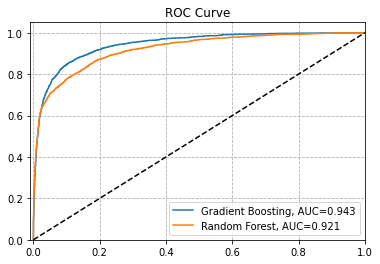

In [202]:
#set up plotting area
plt.figure(0).clf()

# Plot Roc Curve _Gradient Boosting
plt.plot(fpr_gb,tpr_gb,label="Gradient Boosting, AUC="+str(auc_gb))

# Plot Roc Curve _Gradient Boosting
plt.plot(fpr_rf,tpr_rf,label="Random Forest, AUC="+str(auc_rf))

plt.legend(loc='lower right')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.grid(linestyle="--")
plt.title('ROC Curve')
plt.show()

<hr>

<h3>
<font color=Green>Observation: </font>
</h3>

**Gradient Boosting is slow learner (its run time is high compare to Random Forest), but yield a improved result compared to Random Forest.**

__Thus Gradient Boost Model is selected to predict the chrun probablity of the `Train (1).csv` data set.__

<hr>

<h3>
<font color=Brown>Fit the Model on Test Data (CSV Data File)</font>
</h3>

<hr>

In [203]:
# Feature Scaling
X_test_csv_file = scaler.transform(df_test_CAT_CONT_merged)

In [204]:
# Model evaluation on Test csv data set 
y_pred_csv = model_gb.predict(X_test_csv_file)

In [205]:
# Creat a Dataframe from result array 
df_y_pred_test_csv = pd.DataFrame(y_pred_csv,index=df_test_CAT_CONT_merged.index, columns=['churn_probability'])

# Display the head
df_y_pred_test_csv.head()

churn_probability
id                      
69999                  0
70000                  0
70001                  0
70002                  0
70003                  0

In [206]:
# Check Value Counts of predicted 'churn_probability'
df_y_pred_test_csv['churn_probability'].value_counts()

0    29513
1      487
Name: churn_probability, dtype: int64

In [207]:
# Save the DataFrame as csv file
df_y_pred_test_csv.to_csv('submission.csv')

<hr>

<h3>
<font color=Green>Summary: </font>
</h3>

* The provided train data set is highly skewed towards the non-churn data set. The churn data in the provided `train(1).csv` file is only 10%.

* To counter this imbalance, Synthetic Minority Oversampling Technique (SMOTE) is used for the imbalance nature of the data set.

* Any filtering on the data rows of training csv file to calculate the high value customer had the significant reduction in churn=1 data rows (which is merely 10% and biased towards non-churn set). This result in the instability of model prediction. To confirm the same please uncomment the codes provided under HVC section.

* To have the quick & smater comparisons of the different classification, Pycaret module is used (limited to model comparison only).

* The Gradient Boost Classification is implemented as selected model, which is also suggested by Pycaret Model comparison.

* Followings are the Gradient Boost model result: 
    - Accuracy =  0.942
    - Sensitivity = 0.611
    - Specificity = 0.978
    - ROC_AUC = 0.94

* The `submission.csv` file is written from the GB classification prediction of `Test (1).csv`.

* Disclaimer: The presented model is one of model solution as estimated, however there is always a possiblity for improvement in the modelling scheme.

<hr>

<h2>
<font color=Green>Thanking You.</font>
</h2>
<hr>